Part1: 탐색적 데이터 분석
 1. 특성(피처) 분석
 2. 여러 특성들을 고려하여 관계나 경향(트렌드) 찾기

Part2: 특성 공학 및 데이터 정제
 1. 새로운 특성 몇 가지 추가하기
 2. 불필요한(중복된) 특성 제거하기
 3. 특성들을 모델링에 적합한 형태로 변환하기

Part3: 예측 모델링
 1. 기본 알고리즘 실행하기
 2. 교차 검증
 3. 앙상블
 4. 중요 특성 추출

#Part1: 탐색적 데이터 분석(EDA)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')  #Matplotlib으로 그리는 모든 그래프의 색상, 폰트 크기, 배경색, 축 눈금 등 전반적인 디자인을 'fivethirtyeight' 스타일에 맞게 변
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline #Matplotlib으로 생성된 그래프가 별도의 창으로 팝업되지 않고, 현재 작업 중인 노트북 셀 바로 아래에 나타나도록 설정

UsageError: unrecognized arguments: #Matplotlib으로 생성된 그래프가 별도의 창으로 팝업되지 않고, 현재 작업 중인 노트북 셀 바로 아래에 나타나도록 설정


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data= pd.read_csv('/content/drive/MyDrive/train.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.isnull().sum() #null 데이터 확인하기

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Age, Cabin, Embarked에 Null이 있으므로 이들을 고칠 것임

##Survived가 몇명인가?

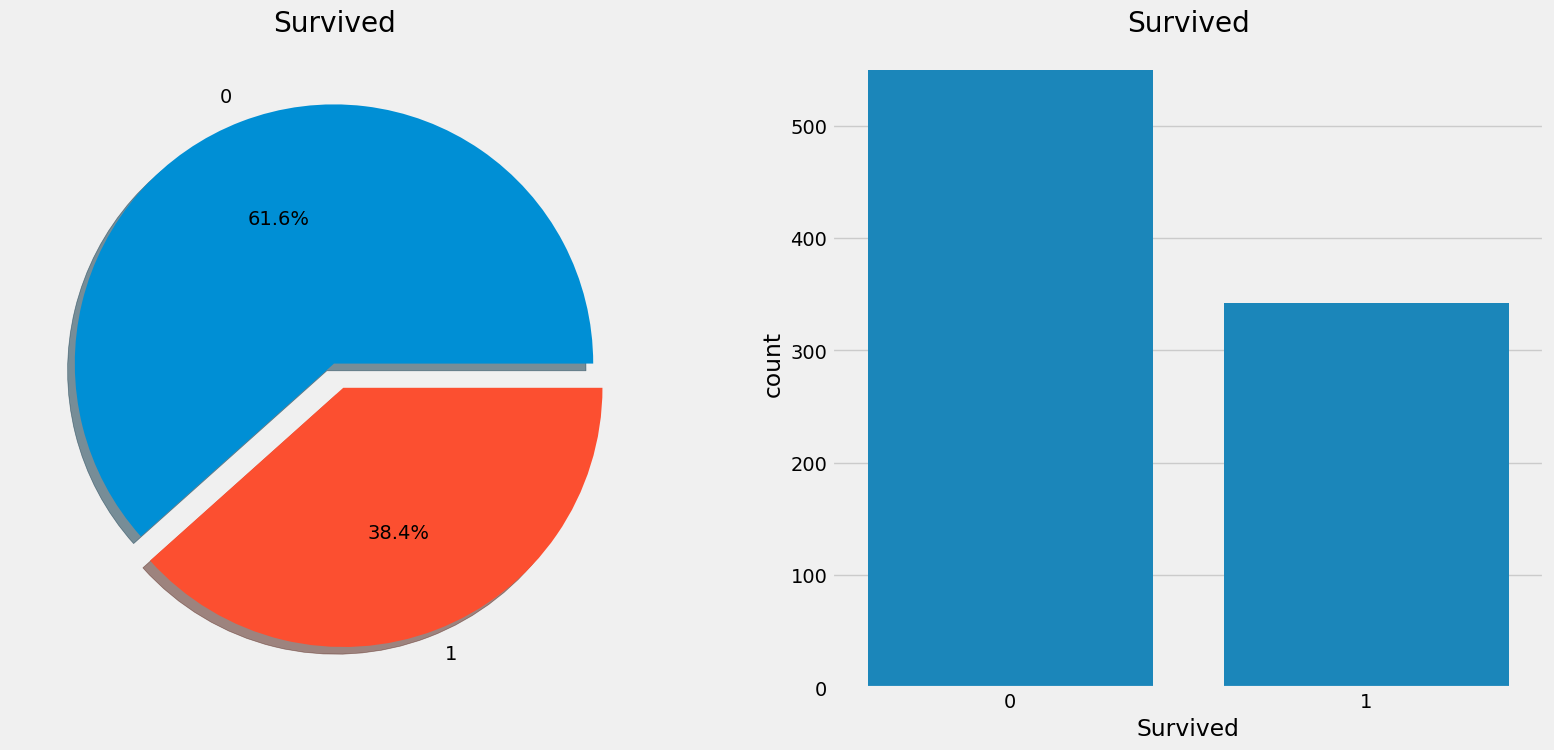

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot(x = 'Survived', data=data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

사고에서 많은 승객이 생존하지 못했다는 것은 분명합니다.

훈련 데이터셋에 있는 891명의 승객 중, 약 350명만이 생존했습니다. 즉, 전체 훈련 데이터셋 중 단지 38.4%만이 충돌에서 살아남았습니다. 우리는 데이터에서 더 나은 통찰력을 얻고, 어떤 범주의 승객이 생존했고, 어떤 범주가 생존하지 못했는지 확인하기 위해 더 깊이 파고들어야 합니다.

이제 데이터셋의 여러 특성(피처)을 사용하여 생존율을 확인해 볼 것입니다. 그 특성들 중 일부는 성별(Sex), 탑승 항구(Port Of Embarcation), 나이(Age) 등입니다.

먼저 다양한 종류의 특성(Features)을 이해해 봅시다.

## 피처들의 유형
1. 범주형 특성: 두 개 이상의 범주를 가지며, 해당 특성의 각 값은 그 범주들로 분류될 수 있는 변수입니다. 예를 들어, 성별(Gender)은 남성과 여성이라는 두 가지 범주를 가진 범주형 변수입니다. 이러한 변수에는 순서를 매기거나 정렬할 수 없습니다. 이들은 명목 변수(Nominal Variables)라고도 불립니다.

데이터셋의 범주형 특성: Sex (성별), Embarked (탑승 항구)

2. 순서형 특성: 순서형 변수는 범주형 값과 유사하지만, 그 차이점은 값들 사이에 상대적인 순서나 정렬을 가질 수 있다는 것입니다. 예를 들어, 키(Height)라는 특성이 '큼(Tall)', '중간(Medium)', '작음(Short)'**이라는 값을 가진다면, 키는 순서형 변수입니다. 여기서 우리는 변수에 상대적인 순서를 부여할 수 있습니다.

데이터셋의 순서형 특성: PClass (객실 등급)

3. 연속형 특성: 연속형 특성은 해당 특성 열의 최소값과 최대값 사이, 혹은 임의의 두 지점 사이의 모든 값을 가질 수 있는 변수입니다.

데이터셋의 연속형 특성: Age (나이)

## 피처들 분석하기


### 성별: 범주형 피처

In [ ]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

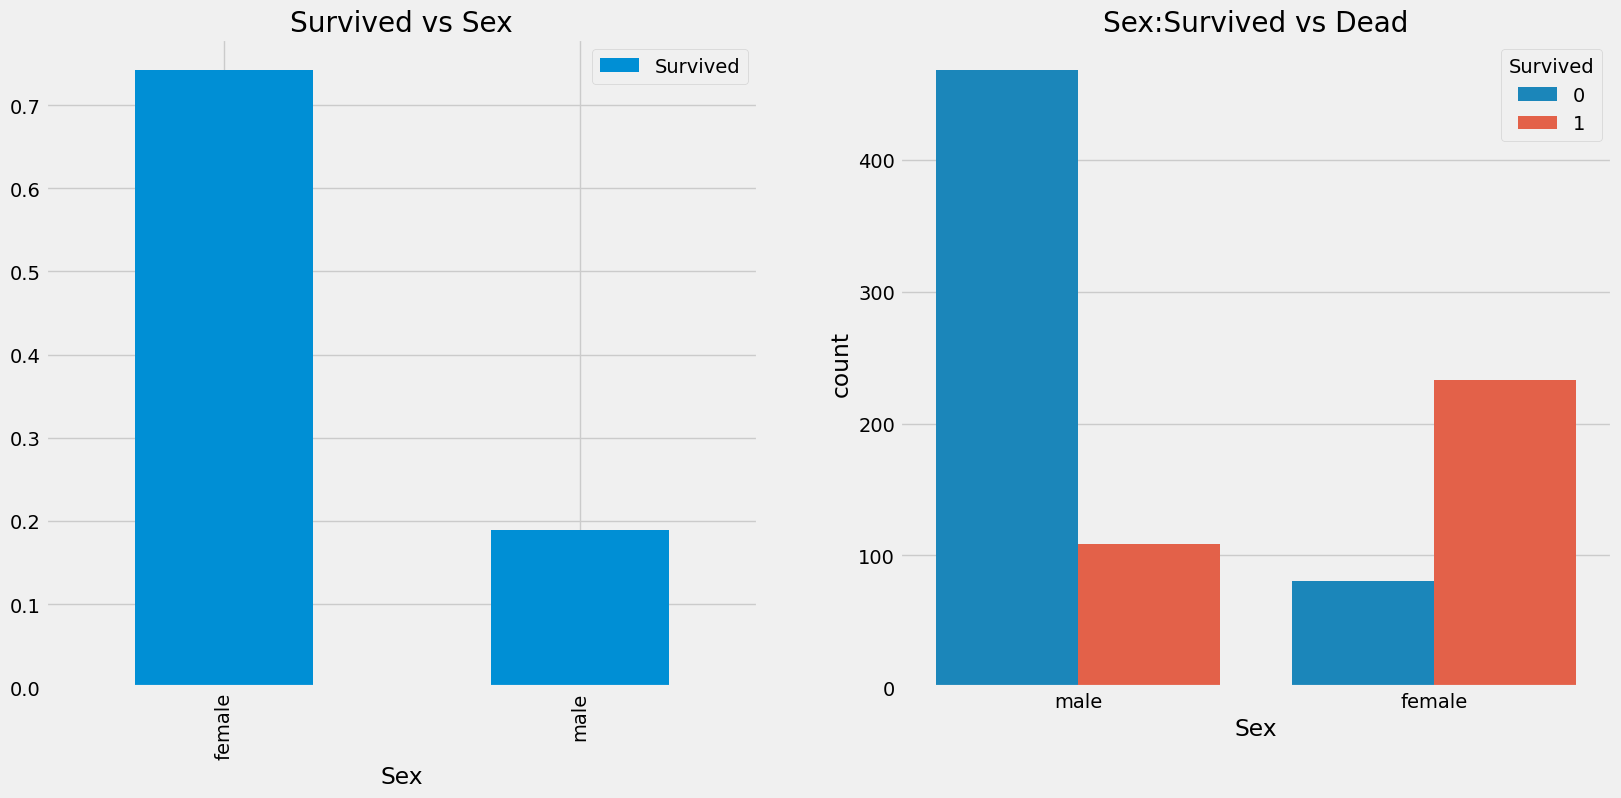

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(x='Sex',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

배에 탑승했던 남성의 수가 여성의 수보다 훨씬 많았습니다. 그럼에도 불구하고, 생존한 여성의 수는 생존한 남성의 수보다 거의 두 배에 달합니다.

배에 탔던 여성의 생존율은 약 75%인 반면, 남성의 생존율은 약 18~19%에 불과합니다.

###Pclass: 순서형 피처

In [ ]:
pd.crosstab(data.Pclass,data.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


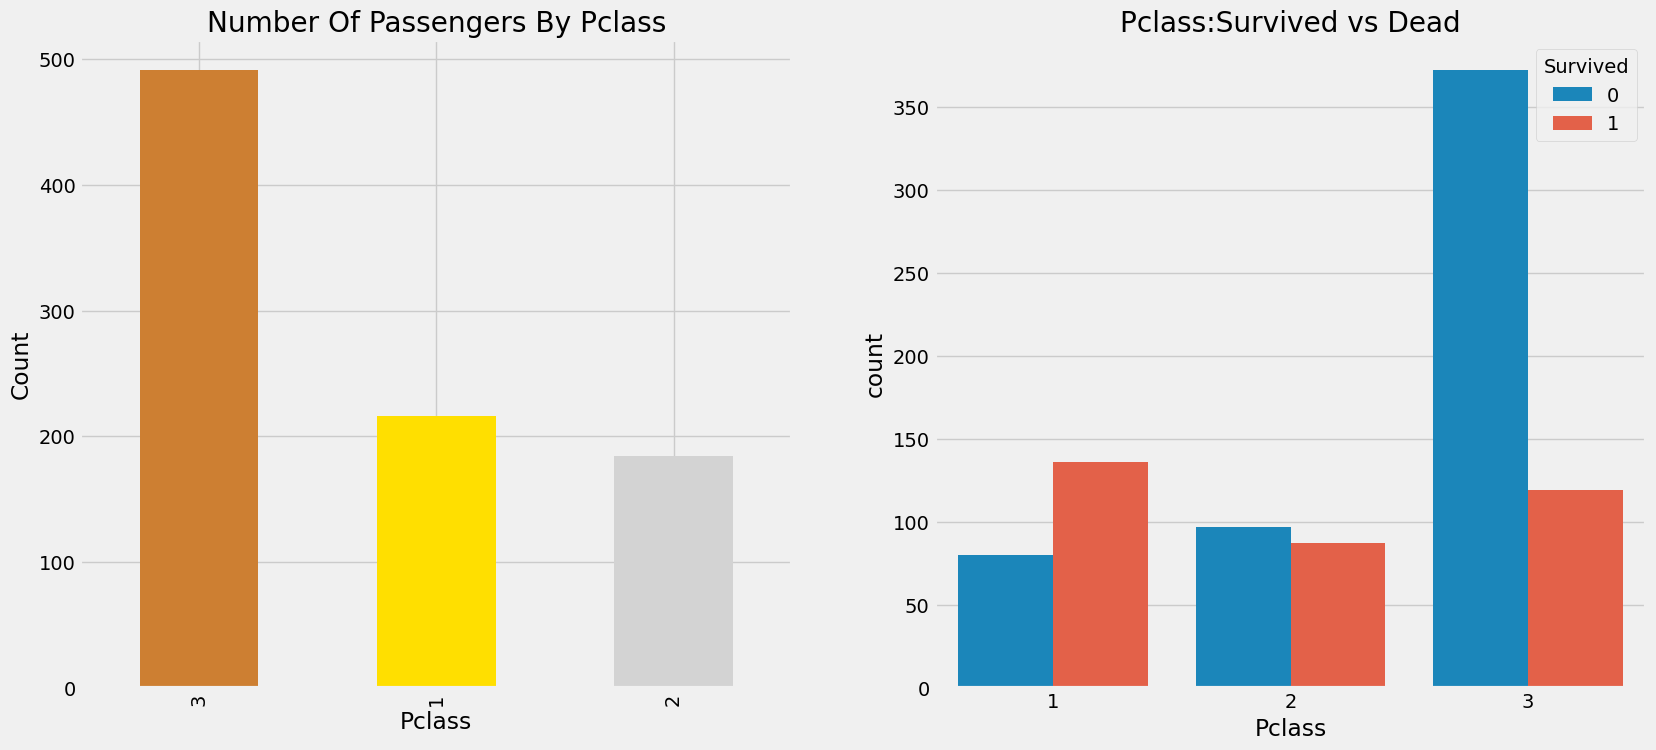

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot(x='Pclass',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

구조 당시 1등급(Pclass 1) 승객들에게 매우 높은 우선순위가 주어졌음을 분명히 알 수 있습니다.

비록 3등급(Pclass 3) 승객의 수가 훨씬 많았음에도 불구하고, 그들의 생존자 수는 매우 낮아서 약 25% 정도에 불과합니다.

1등급(Pclass 1)의 생존율은 약 63%이며, 2등급(Pclass 2)의 생존율은 약 48%입니다.

In [ ]:
pd.crosstab([data.Sex,data.Survived],data.Pclass,margins=True).style.background_gradient(cmap='summer_r')

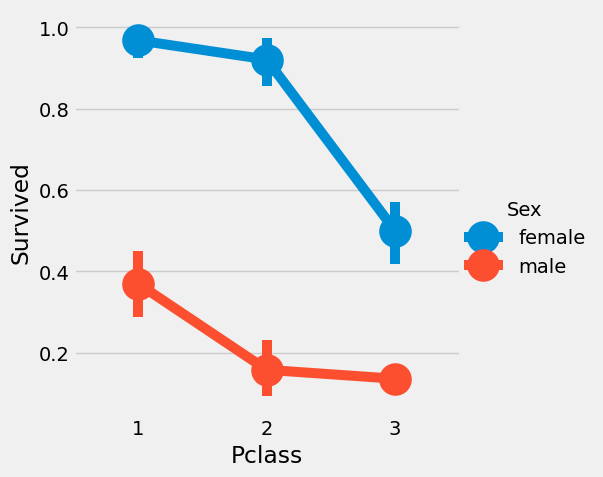

In [ ]:
sns.catplot(x='Pclass',y='Survived',hue='Sex',data=data, kind='point')
plt.show()

범주형 값의 분리를 쉽게 해주기 때문에 우리는 FactorPlot을 사용합니다.

교차표(CrossTab)와 FactorPlot을 보면, 1등급(Pclass 1) 여성의 생존율이 약 95~96%라는 것을 쉽게 추론할 수 있습니다. 1등급 여성 94명 중 단 3명만이 사망했기 때문입니다.

이는 객실 등급(Pclass)과 관계없이 여성들에게 구조 시 최우선 순위가 주어졌음이 분명합니다. 심지어 1등급 남성들조차 생존율이 매우 낮습니다.

### 나이: 연속형 피처

In [ ]:
print('Oldest Passenger was of:',data['Age'].max(),'Years')
print('Youngest Passenger was of:',data['Age'].min(),'Years')
print('Average Age on the ship:',data['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


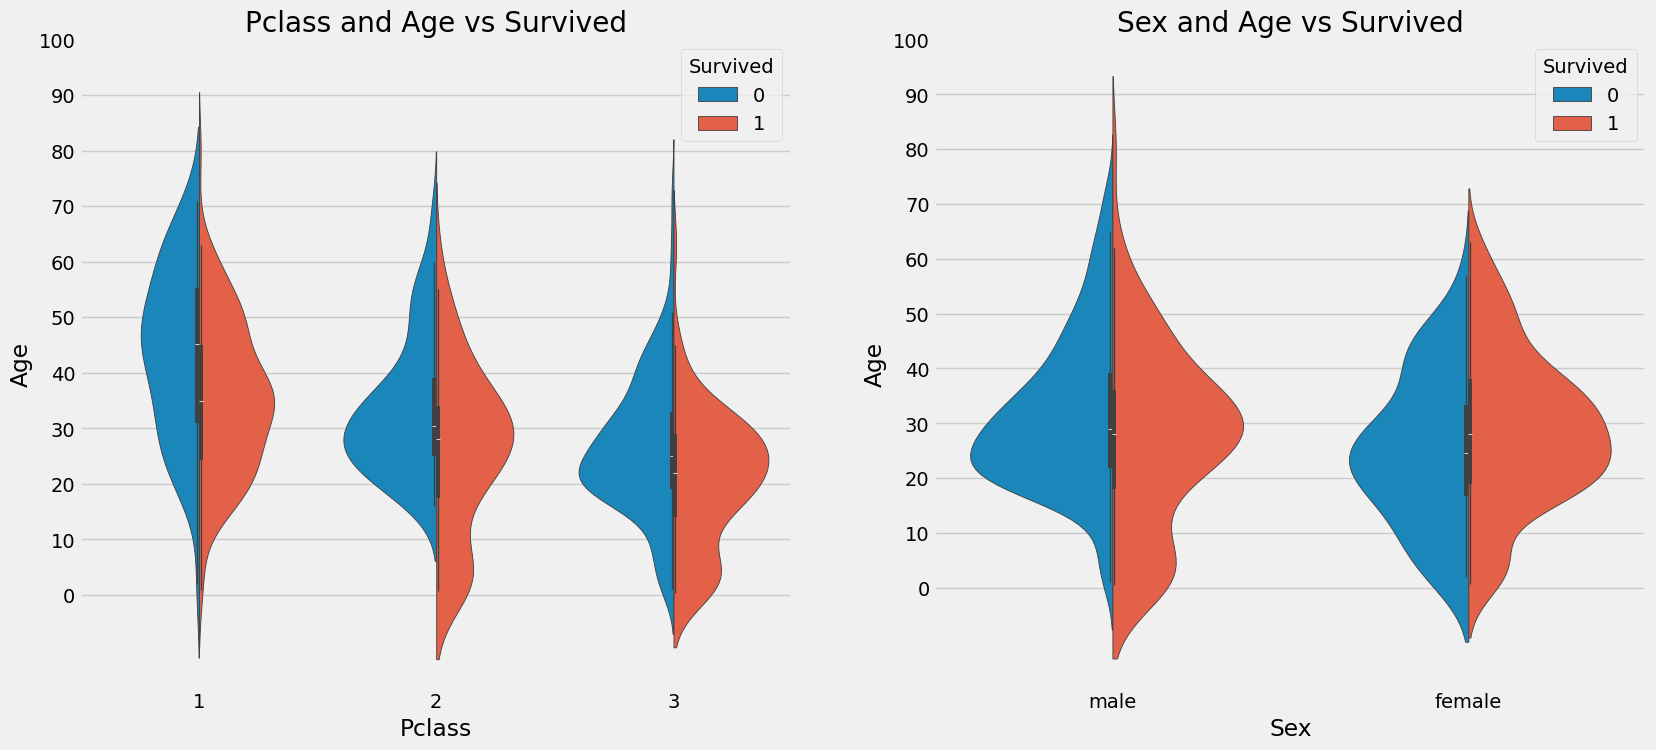

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot(x="Pclass",y="Age", hue="Survived", data=data,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot(x="Sex",y="Age", hue="Survived", data=data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

1. 아이들의 수는 객실 등급(Pclass)이 낮아질수록(3등급으로 갈수록) 증가하며, 10세 미만 승객(아이들)의 생존율은 Pclass와 관계없이 좋아 보입니다.
2. 20~50세 승객의 경우, 1등급(Pclass 1)의 생존 기회는 높으며, 특히 여성에게는 훨씬 더 좋습니다.
3. 남성의 경우, 나이가 증가할수록 생존 기회는 감소합니다.

나이(Age) 결측치 처리 아이디어
앞서 보았듯이, 나이(Age) 특성에는 177개의 결측값이 있습니다. 이 NaN 값들을 대체하기 위해 데이터셋의 평균 나이를 할당할 수도 있습니다.

하지만 문제는, 매우 다양한 연령대의 사람들이 있었다는 것입니다. 4세 아이에게 평균 나이인 29세를 단순히 할당할 수는 없습니다. 승객이 어느 연령대에 속하는지 알아낼 방법이 있을까요?

우리는 이름(Name) 특성을 확인할 수 있습니다. 이 특성을 자세히 살펴보면, 이름에 Mr.나 Mrs. 와 같은 호칭이 포함되어 있음을 알 수 있습니다. 따라서 우리는 해당 그룹(예: Mr. 그룹, Mrs. 그룹)의 평균값을 각 그룹에 할당할 수 있습니다.

In [ ]:
data['Initial']=0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.') #호칭 추출

* [A-Za-z]+: A부터 Z까지, 또는 a부터 z까지의 문자를 하나 이상(+) 찾습니다.
* . (점): 그 문자열 바로 뒤에 마침표(점)가 오는 것을 찾습니다.

이러한 방식으로 우리는 이름 특성에서 호칭을 성공적으로 추출합니다.

In [ ]:
pd.crosstab(data.Initial,data.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


Mlle나 Mme처럼 Miss를 의미하는 오타가 포함된 호칭들이 있습니다.이들을 Miss로 대체할 것이며, 다른 값들에 대해서도 동일한 방식으로 처리할 것입니다.

In [ ]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [ ]:
data.groupby('Initial')['Age'].mean()

,Age
Initial,
Master,4.574167
Miss,21.860000
Mr,32.739609
Mrs,35.981818
Other,45.888889


In [ ]:
## NaN 값들을 평균 나이의 올림 값으로 할당
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

In [ ]:
data.Age.isnull().any()

np.False_

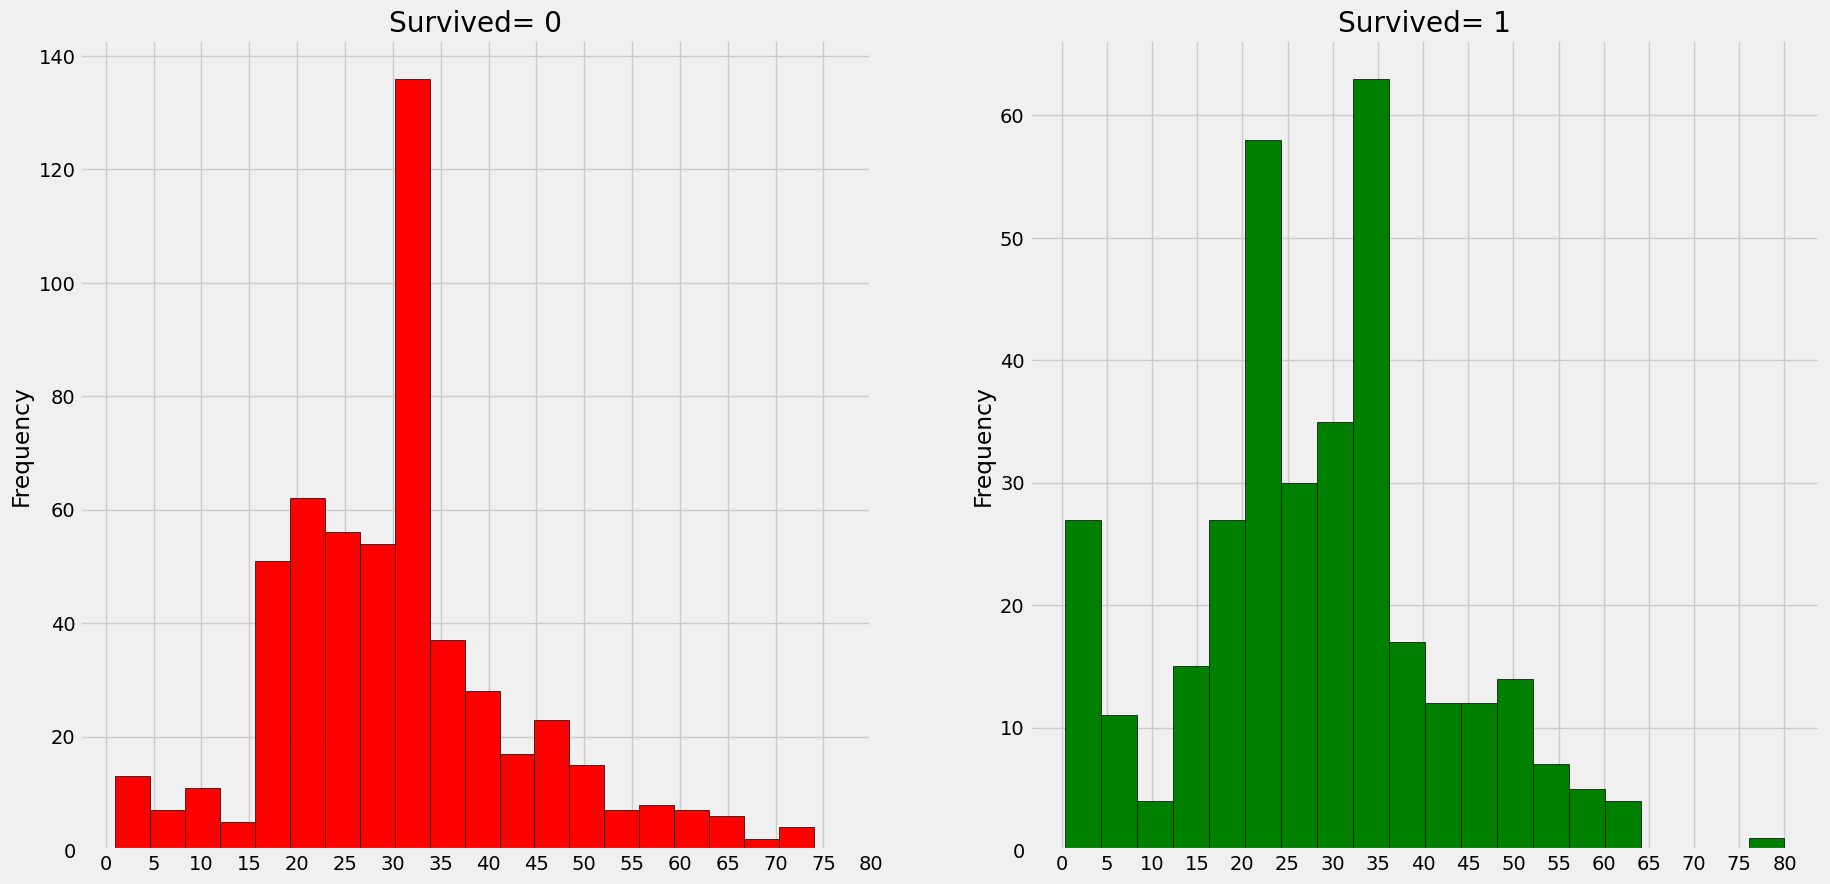

In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

1. 유아(5세 미만) 승객들은 많은 수가 구조되었습니다. ("여성과 아이 먼저" 정책이 적용된 것으로 보입니다.)
2. 가장 나이가 많은 승객 (80세)은 생존했습니다.
3. 사망자의 최대치는 30대에서 40대 사이의 연령대에서 발생했습니다.

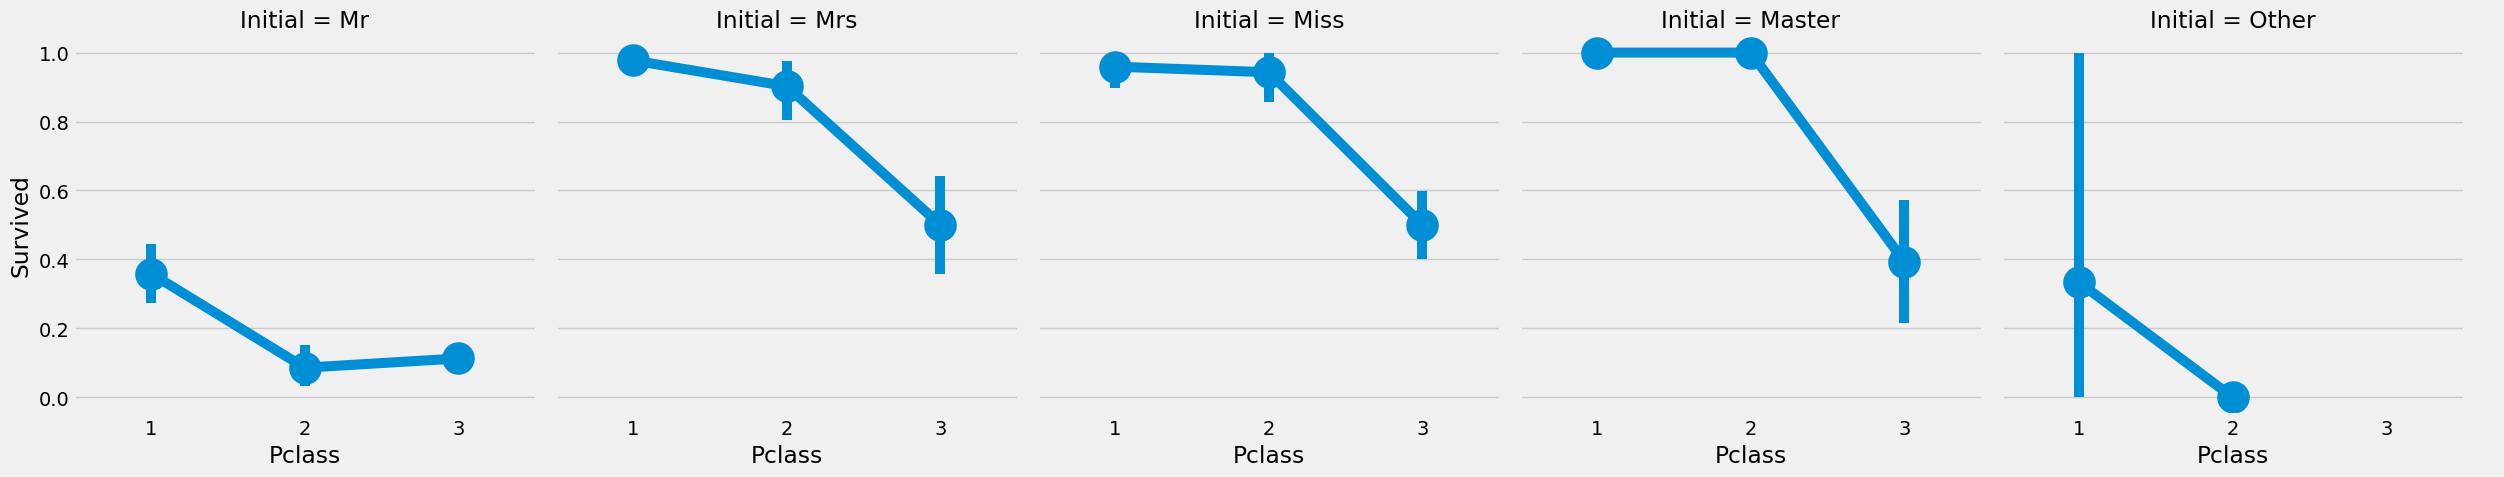

In [ ]:
sns.catplot(x='Pclass',y='Survived',col='Initial',data=data, kind='point')
plt.show()

부유한 1등급이든, 상대적으로 가난한 3등급이든 상관없이, 구조 작업에서 여성과 아이들에게 최우선권이 주어졌다.

### embarked: 범주형 변수

In [ ]:
pd.crosstab([data.Embarked,data.Pclass],[data.Sex,data.Survived],margins=True).style.background_gradient(cmap='summer_r')

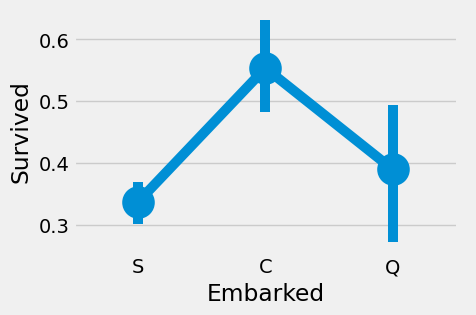

In [ ]:
sns.catplot(x='Embarked',y='Survived',data=data, kind='point')
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

생존확률이 C가 가장 높고, S가 가장 낮음

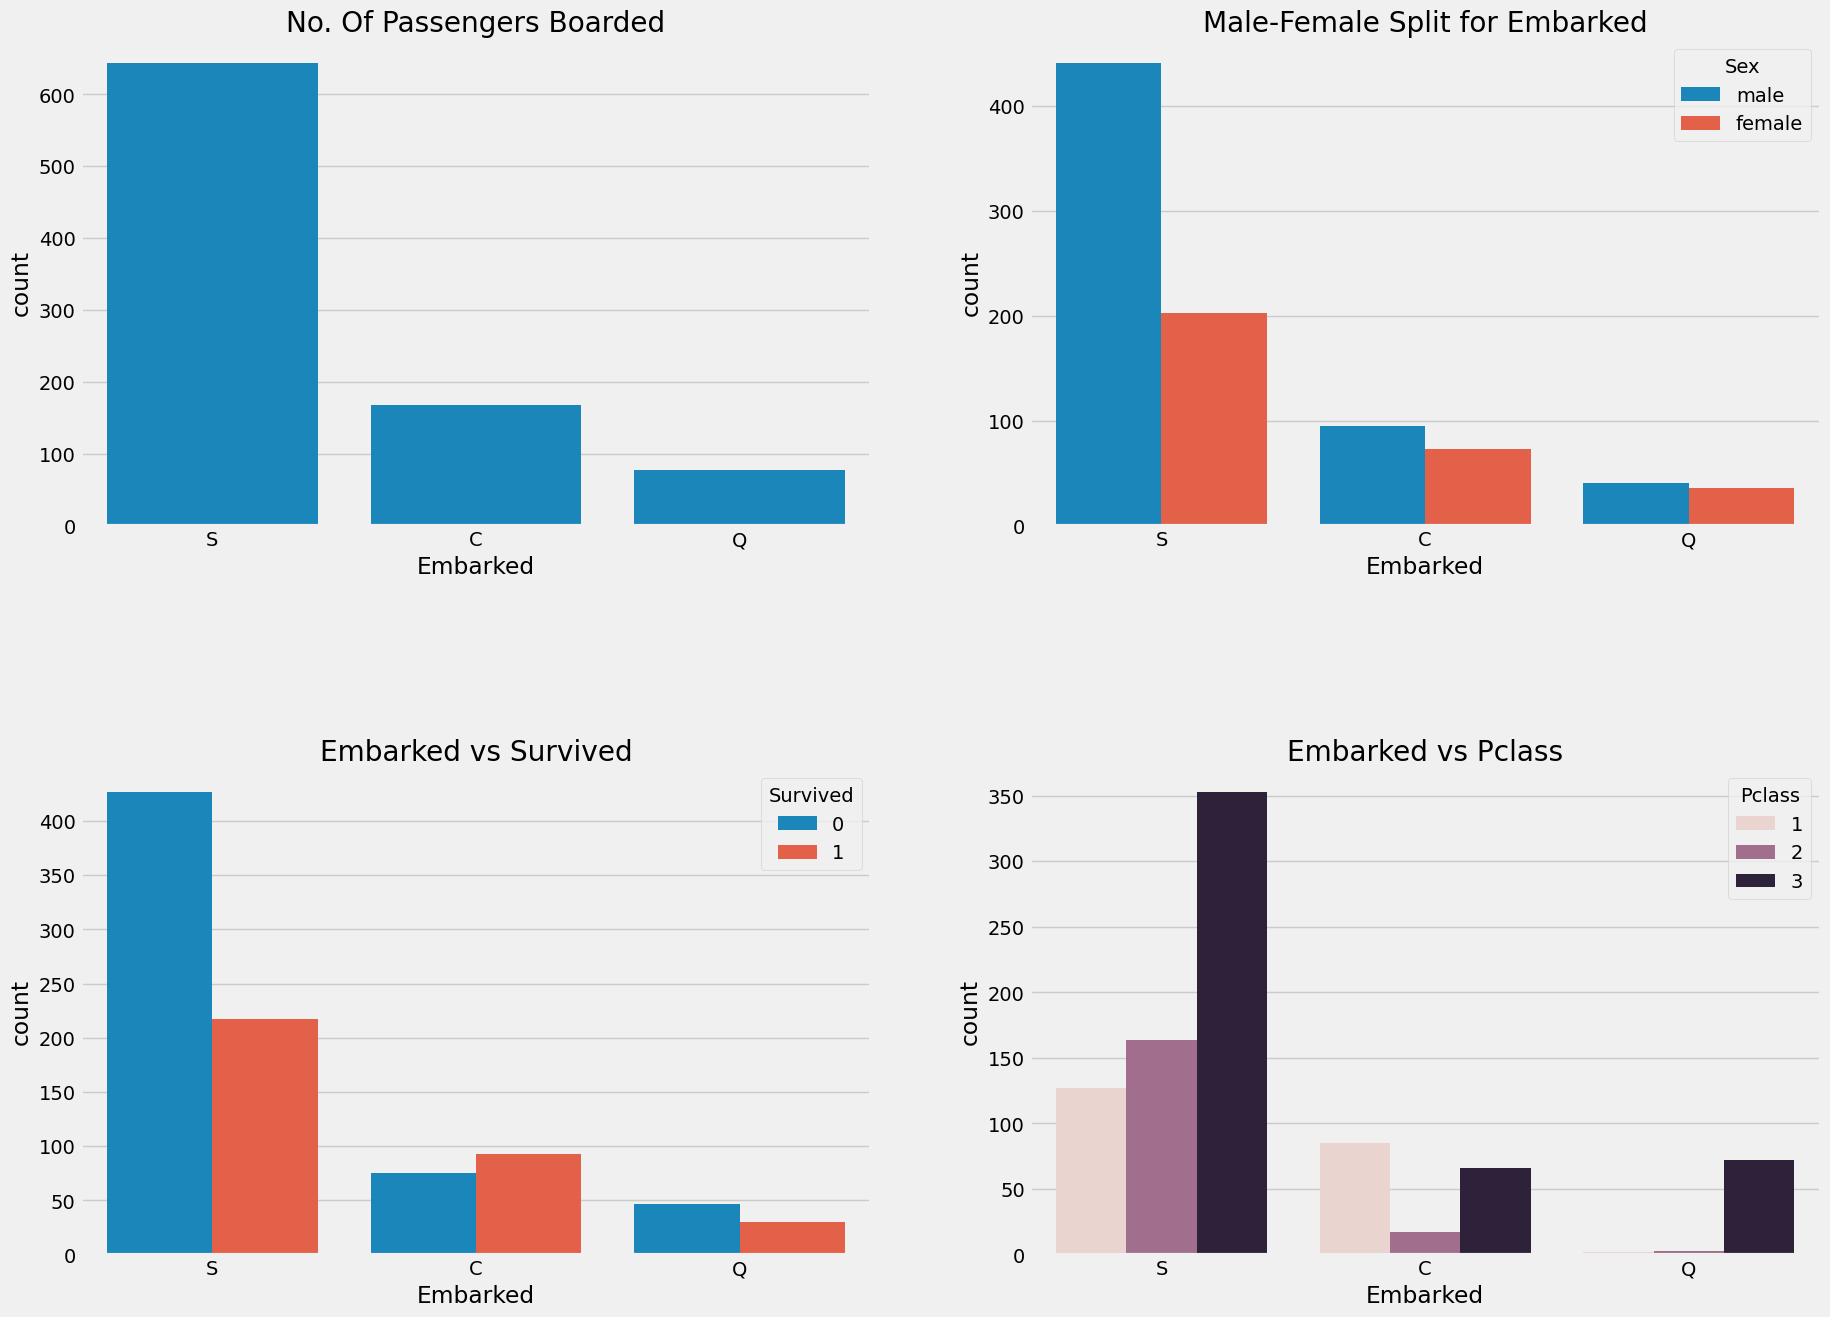

In [ ]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot(x='Embarked',data=data,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot(x='Embarked',hue='Sex',data=data,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot(x='Embarked',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot(x='Embarked',hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

1. 가장 많은 승객이 S 항구에서 탑승했습니다. 이들 대다수는 3등급 (Pclass 3) 승객이었습니다.
2. C 항구에서 탑승한 승객들은 운이 좋았던 것으로 보입니다. 이들 중 상당한 비율이 생존했는데, 그 이유는 아마도 1등급과 2등급 승객 전원이 구조되었기 때문일 수 있습니다.
3. S 항구는 부유한 사람들이 가장 많이 탑승했던 항구로 보입니다. 그럼에도 불구하고 이곳의 생존 가능성이 낮은 이유는, 3등급 승객 중 약 81%가 생존하지 못했기 때문입니다.
4. Q 항구에서 탑승한 승객의 거의 95%가 3등급 (Pclass 3)이었습니다.

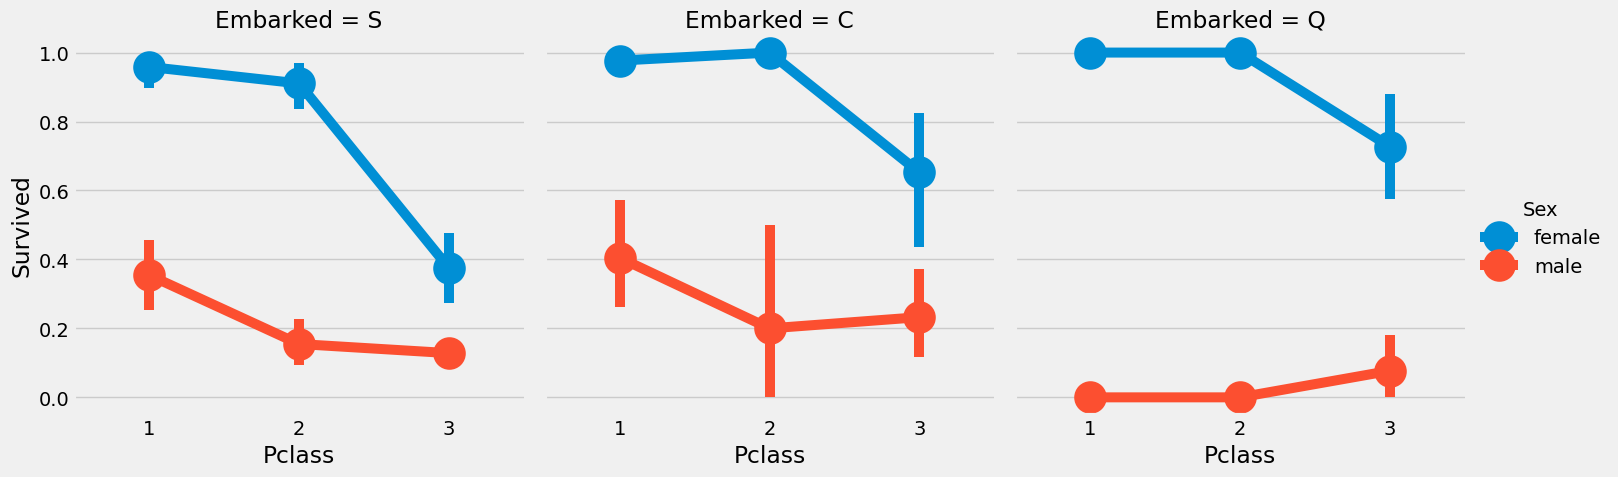

In [ ]:
sns.catplot(x='Pclass',y='Survived',hue='Sex',col='Embarked',data=data, kind='point')
plt.show()

1. 1등급(Pclass 1)과 2등급(Pclass 2) 여성의 생존 가능성은 객실 등급에 관계없이 거의 1(거의 100%)에 가깝습니다.
2. S 항구는 3등급 승객들에게 매우 불운했던 것으로 보입니다. 남성과 여성 모두의 생존율이 매우 낮았기 때문입니다.
3. Q 항구는 남성들에게 가장 불운했던 것으로 보입니다. 거의 모든 승객이 3등급이었기 때문입니다.

In [ ]:
data['Embarked'].fillna('S',inplace=True) #선택한 열에서 결측값(NaN)을 찾아서, 그 값을 문자열 'S'로 채움

In [ ]:
data.Embarked.isnull().any()

np.False_

### SibSp (Sibling/Spouse) —> 이산형 특성
이 특성은 개인이 혼자 여행하는지 아니면 가족 구성원과 함께 여행하는지를 나타냅니다.

Sibling = 형제, 자매, 의붓형제, 의붓자매  / Spouse = 남편, 아내

In [ ]:
pd.crosstab([data.SibSp],data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


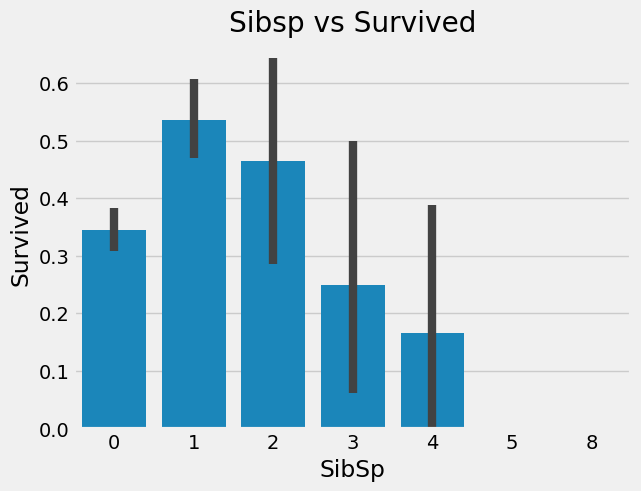

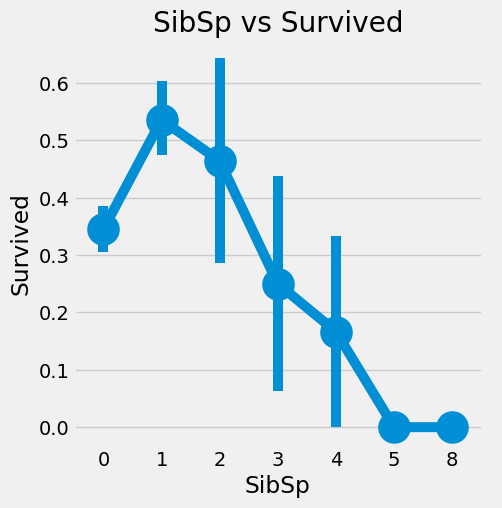

In [ ]:
# catplot은 subplot이 Axes 위에 직접 그릴 수 없으므로 subplot 안에 직접 넣을 수 없음
sns.barplot(x='SibSp',y='Survived',data=data)
plt.title('Sibsp vs Survived')
sns.catplot(x='SibSp',y='Survived',data=data, kind='point')
plt.title('SibSp vs Survived')
plt.show()

In [ ]:
pd.crosstab(data.SibSp,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


막대 그래프(barplot)와 팩터 그래프(factorplot)를 보면, 형제나 배우자 없이 혼자 탑승한 승객의 생존율은 34.5%입니다. 형제/배우자의 수가 증가하면 그래프가 대략적으로 하락하는 것을 볼 수 있습니다.

이는 말이 됩니다. 즉, 배에 가족이 있다면 자신을 먼저 구하기보다 가족을 구하려고 노력할 것이기 때문입니다. 놀랍게도, 5~8명의 가족 구성원을 가진 사람들의 생존율은 0%입니다. 그 이유가 객실 등급(Pclass) 때문일까요?

이유는 Pclass입니다. 교차표(crosstab)를 보면, SibSp가 3을 초과하는 승객들(대규모 가족)은 모두 3등급(Pclass 3)에 있었습니다. 3등급에 탑승한 모든 대규모 가족(3명 초과)이 사망했다는 것이 분명합니다

In [ ]:
### Parch

In [ ]:
pd.crosstab(data.Parch,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


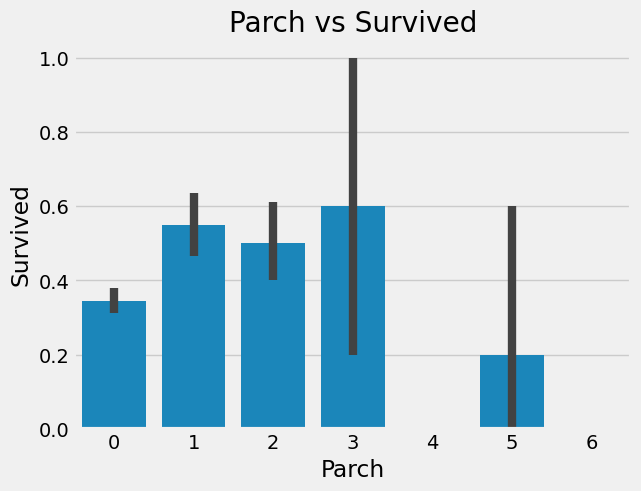

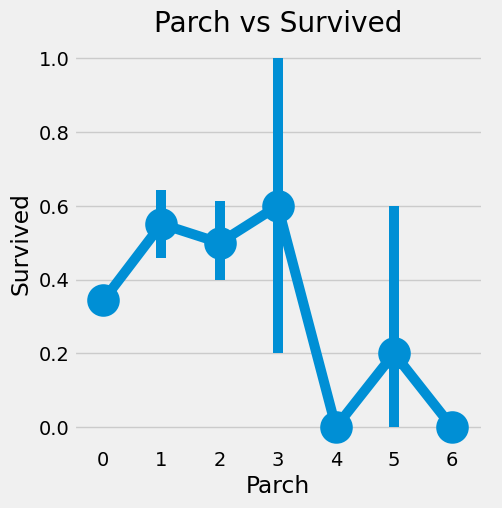

In [ ]:
sns.barplot(x='Parch',y='Survived',data=data)
plt.title('Parch vs Survived')
sns.catplot(x='Parch',y='Survived',data=data, kind='point')
plt.title('Parch vs Survived')
plt.show()

부모/자녀와 함께 탑승한 승객은 생존 가능성이 더 높습니다. 하지만 그 수가 증가할수록 생존 가능성은 감소합니다.

배에 1명에서 3명의 부모/자녀를 둔 사람은 생존 기회가 좋습니다. 혼자인 경우 역시 치명적인 것으로 나타났으며, 배에 4명 이상의 부모/자녀를 둔 경우에도 생존 가능성은 감소합니다.

### Fare: 연속형 피처

In [ ]:
print('Highest Fare was:',data['Fare'].max())
print('Lowest Fare was:',data['Fare'].min())
print('Average Fare was:',data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.204207968574636


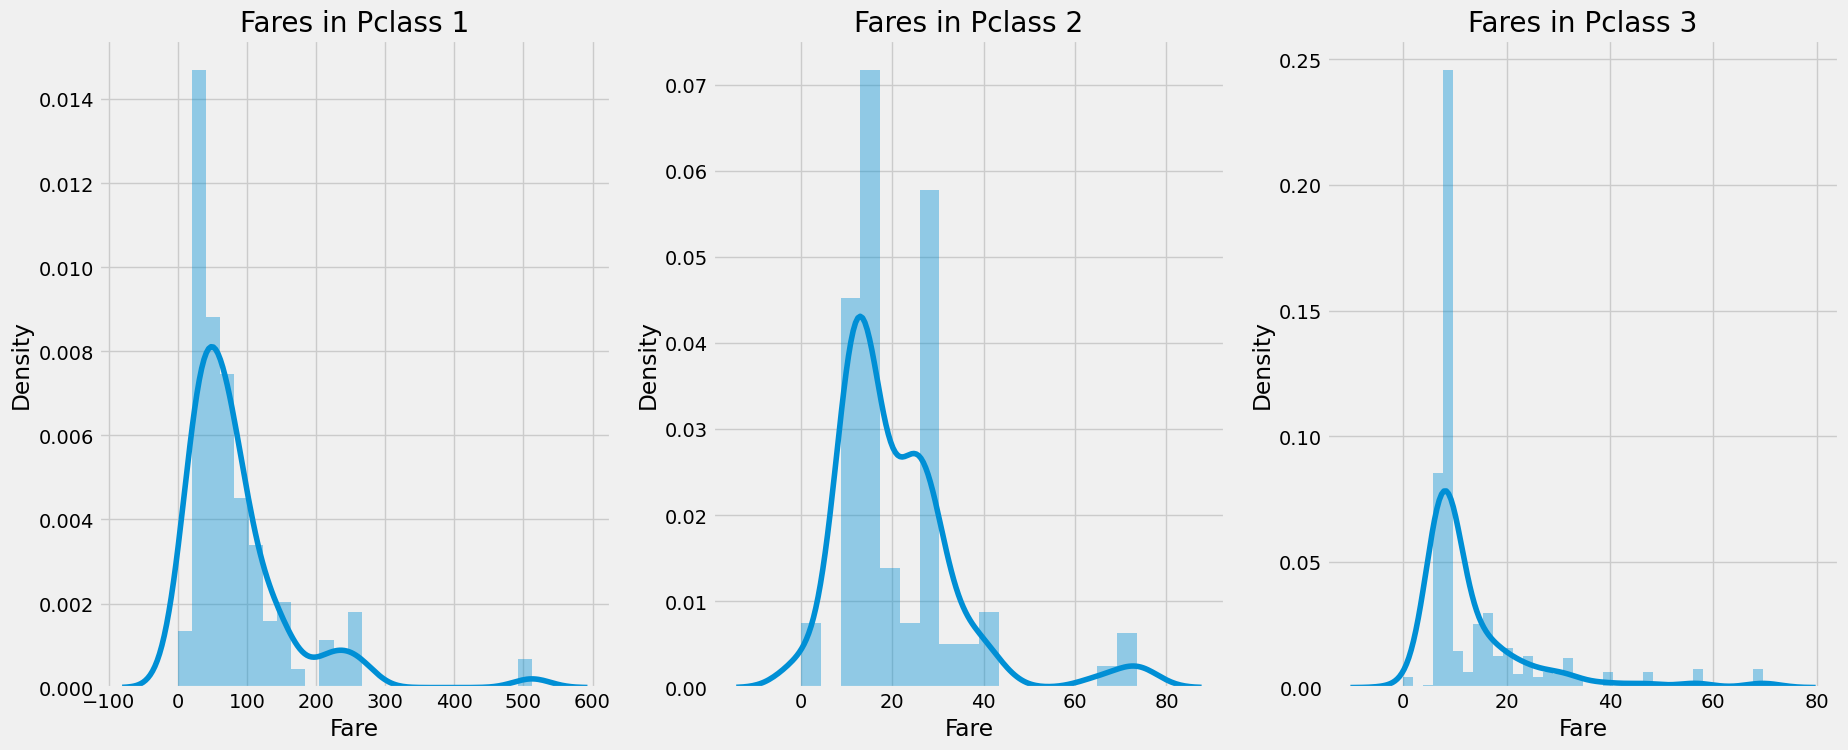

In [ ]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(data[data['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(data[data['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(data[data['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

1등급(Pclass 1) 승객의 운임(Fare)에는 광범위한 분포가 있는 것으로 보이며, 이러한 분포는 객실 등급이 낮아질수록(기준이 낮아질수록) 계속 감소합니다.

운임 또한 연속적인 값을 가지므로, 이산화(Binning)를 사용하여 이를 이산적인 값으로 변환할 수 있습니다.



###모든 특성에 대한 핵심 관찰 결과 요약
1. Sex (성별): 여성의 생존 가능성이 남성에 비해 높습니다.
2. Pclass (객실 등급): 1등급 승객이 생존 가능성이 더 높다는 뚜렷한 경향이 있습니다. 3등급의 생존율은 매우 낮습니다. 여성의 경우, 1등급의 생존율은 거의 100%에 가까우며, 2등급 여성의 생존율 또한 높습니다.
3. Age (나이): 5~10세 미만의 아이들은 생존 가능성이 높습니다. 15세부터 35세 사이의 연령대 승객들이 많이 사망했습니다.
4. Embarked (탑승 항구): 이 특성은 매우 흥미롭습니다. 1등급 승객의 대다수가 S에서 탑승했음에도 불구하고, C 항구에서 탑승한 승객의 생존 가능성이 더 좋아 보입니다. Q 항구 승객은 거의 모두 3등급이었습니다.
5. Parch + SibSp (부모/자녀 + 형제/배우자): 1~2명의 형제/배우자 또는 1~3명의 부모/자녀와 함께 탑승하는 것이, 혼자이거나 매우 큰 규모의 가족과 함께 여행하는 것보다 더 높은 생존 확률을 보여줍니다.

## 피처 간의 상관관계

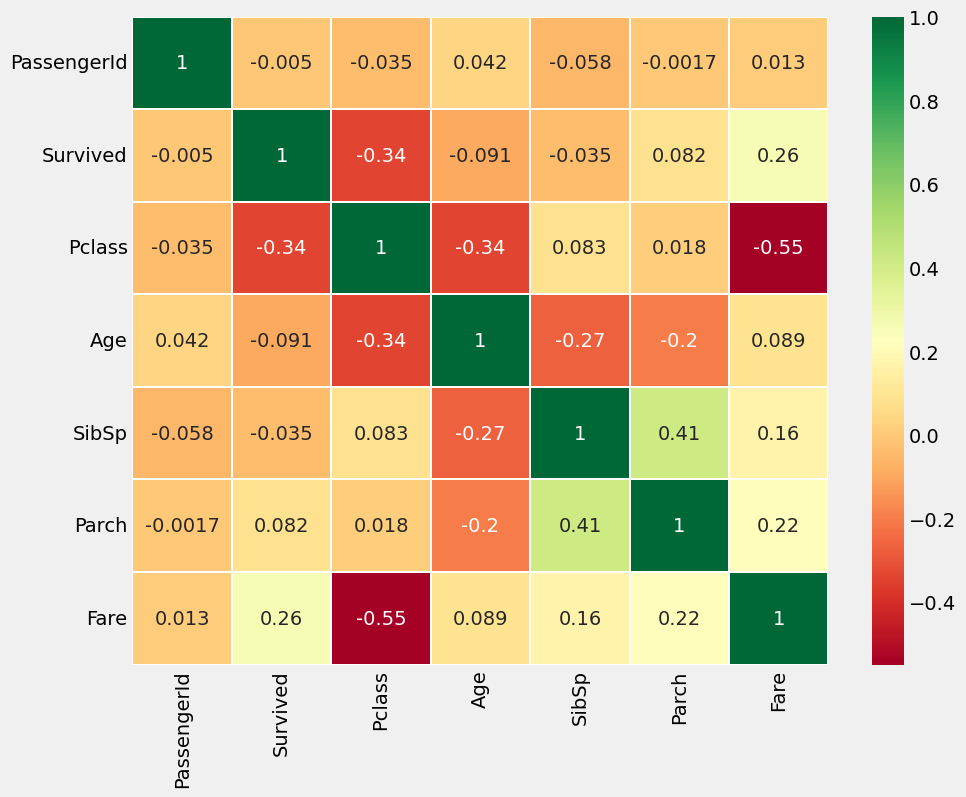

In [ ]:
cols = ['PassengerId','Survived','Pclass','Age','SibSp','Parch','Fare']
sns.heatmap(data[cols].corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

가장 먼저 주목할 점은 숫자형 특성만이 비교된다는 것입니다. 알파벳이나 문자열 사이의 상관관계를 계산할 수 없다는 것은 명확합니다. 그래프를 이해하기 전에, 상관관계가 정확히 무엇인지 알아봅시다.

양의 상관관계: 만약 특성 A의 증가가 특성 B의 증가로 이어진다면, 이들은 양의 상관관계를 가집니다. 값 1은 완벽한 양의 상관관계를 의미합니다.

음의 상관관계: 만약 특성 A의 증가가 특성 B의 감소로 이어진다면, 이들은 음의 상관관계를 가집니다. 값 -1은 완벽한 음의 상관관계를 의미합니다.

이제 두 특성이 높거나 완벽하게 상관되어 있다고 가정해 봅시다. 이는 한 특성의 증가가 다른 특성의 증가로 이어진다는 의미입니다. 다시 말해, 두 특성 모두 매우 유사한 정보를 담고 있으며, 정보의 분산이 거의 없거나 아예 없다는 뜻입니다. 이처럼 두 특성이 거의 동일한 정보를 포함하고 있을 때 이를 다중공선성이라고 합니다.

그렇다면 우리는 이 두 특성을 모두 사용해야 할까요? 둘 중 하나는 불필요하기 때문에 하나만 사용해야 합니다. 모델을 만들거나 훈련할 때, 훈련 시간을 줄여주는 등의 여러 이점 때문에 불필요한 특성들을 제거하려고 노력해야 합니다.

이제 위의 히트맵에서, 특성들이 서로 크게 상관되어 있지 않음을 알 수 있습니다. 가장 높은 상관관계는 SibSp와 Parch 사이의 0.41입니다. 따라서 우리는 모든 특성을 가지고 계속 진행할 수 있습니다.

#Part2: 특성 공학(Feature Engineering) 및 데이터 정제(Data Cleaning)

특성 공학이란 무엇일까요?
데이터셋에 특성(피처)이 주어졌을 때, 모든 특성이 중요할 필요는 없습니다. 제거해야 할 불필요한 특성이 많을 수 있습니다. 또한, 다른 특성들을 관찰하거나 정보를 추출하여 새로운 특성을 얻거나 추가할 수 있습니다.

예를 들어, 이름 특성을 사용하여 호칭 특성을 얻은 것처럼 말입니다. 이제 새로운 특성을 얻고 몇 가지 특성을 제거할 수 있는지 확인해 봅시다. 또한, 기존의 관련 특성들을 예측 모델링에 적합한 형태로 변환할 것입니다.




## Age_band
나이 특성의 문제점:앞서 언급했듯이, 나이는 연속형 특성이며, 머신러닝 모델에서 연속형 변수에는 문제가 있습니다.

예: 만약 스포츠 선수들을 성별로 그룹화하거나 분류하라고 하면, 남성과 여성으로 쉽게 구분할 수 있습니다.

하지만 이제 그들을 나이로 그룹화하라고 하면 어떻게 할까요? 만약 30명의 선수가 있다면, 30개의 나이 값이 있을 수 있습니다. 이제 이것이 문제가 됩니다.

우리는 이 연속적인 값들을 이산화(Binning)나 정규화를 통해 범주형 값으로 변환해야 합니다. 저는 이산화(Binning)를 사용할 것입니다. 즉, 일정 범위의 나이를 하나의 구간(bin)으로 그룹화하거나 하나의 값으로 할당하는 것입니다.알겠습니다. 승객의 최대 나이는 80세였습니다. 이제 0세부터 80세까지의 범위를 5개의 구간으로 나누어 봅시다. 따라서 80 / 5 = 16이므로, 각 구간의 크기는 16이 됩니다.

In [ ]:
data['Age_band']=0
data.loc[data['Age']<=16,'Age_band']=0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64),'Age_band']=3
data.loc[data['Age']>64,'Age_band']=4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [ ]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')

,count
Age_band,
1,382
2,325
0,104
3,69
4,11


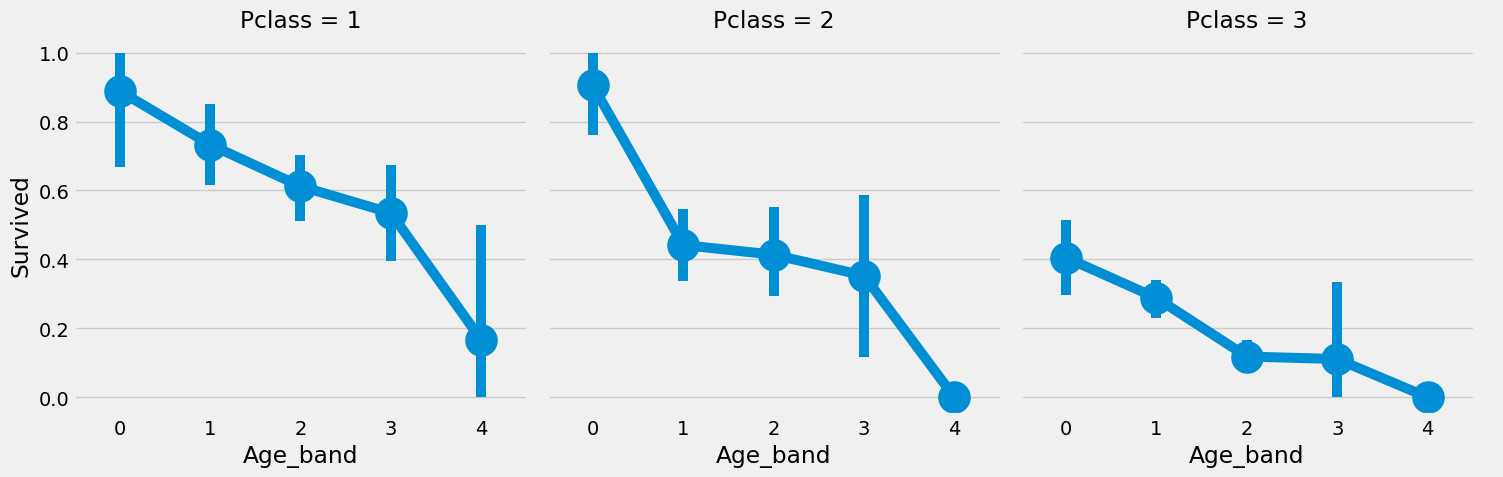

In [ ]:
sns.catplot(x='Age_band',y='Survived',data=data, col='Pclass', kind='point')
plt.show()

등급과 관계없이 나이가 많을수록 생존율이 낮아짐

## Family_Size and Alone
"Family_size" (가족 규모) 와 "Alone" (단독 탑승 여부) 이라는 새로운 특성을 만들고 이를 분석할 수 있습니다.
- "Family_size" 특성은 Parch (부모/자녀 수) 와 SibSp (형제/배우자 수) 를 합산한 값입니다. 이 합산된 데이터를 통해 생존율이 승객의 가족 규모와 관련이 있는지 확인할 수 있습니다.
- "Alone" 특성은 승객이 혼자 탑승했는지 아닌지를 나타낼 것입니다.

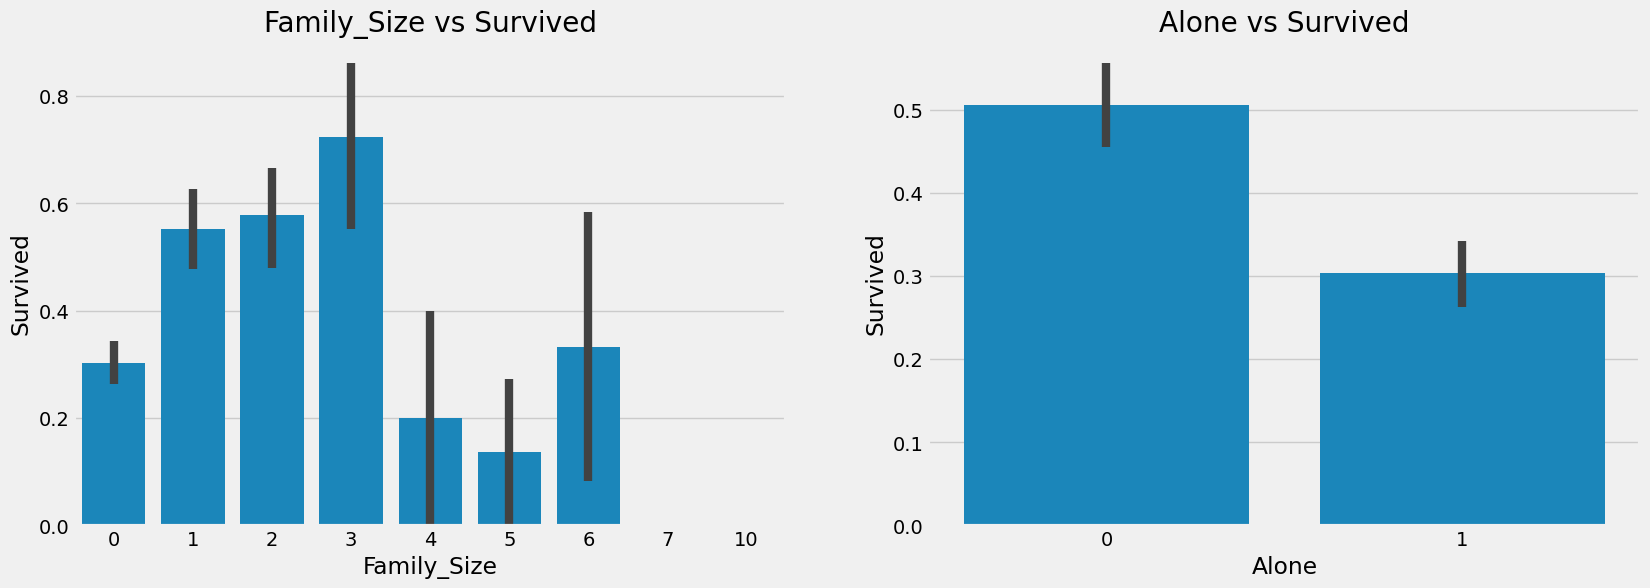

In [ ]:
data['Family_Size']=0
data['Family_Size']=data['Parch']+data['SibSp']#family size
data['Alone']=0
data.loc[data.Family_Size==0,'Alone']=1#Alone

f,ax=plt.subplots(1,2,figsize=(18,6))
sns.barplot(x='Family_Size',y='Survived',data=data,ax=ax[0])
ax[0].set_title('Family_Size vs Survived')
sns.barplot(x='Alone',y='Survived',data=data,ax=ax[1])
ax[1].set_title('Alone vs Survived')
plt.close(2)
plt.close(3)
plt.show()

Family_Size=0이라는 것은 승객이 혼자라는 것을 의미합니다.

분명히, 혼자이거나(Family_Size=0) 가족 규모가 0인 경우 생존 가능성은 매우 낮습니다. 가족 규모가 4를 초과하는 경우에도 생존 가능성은 감소합니다.

이것 역시 모델에 있어 중요한 특성인 것으로 보입니다.

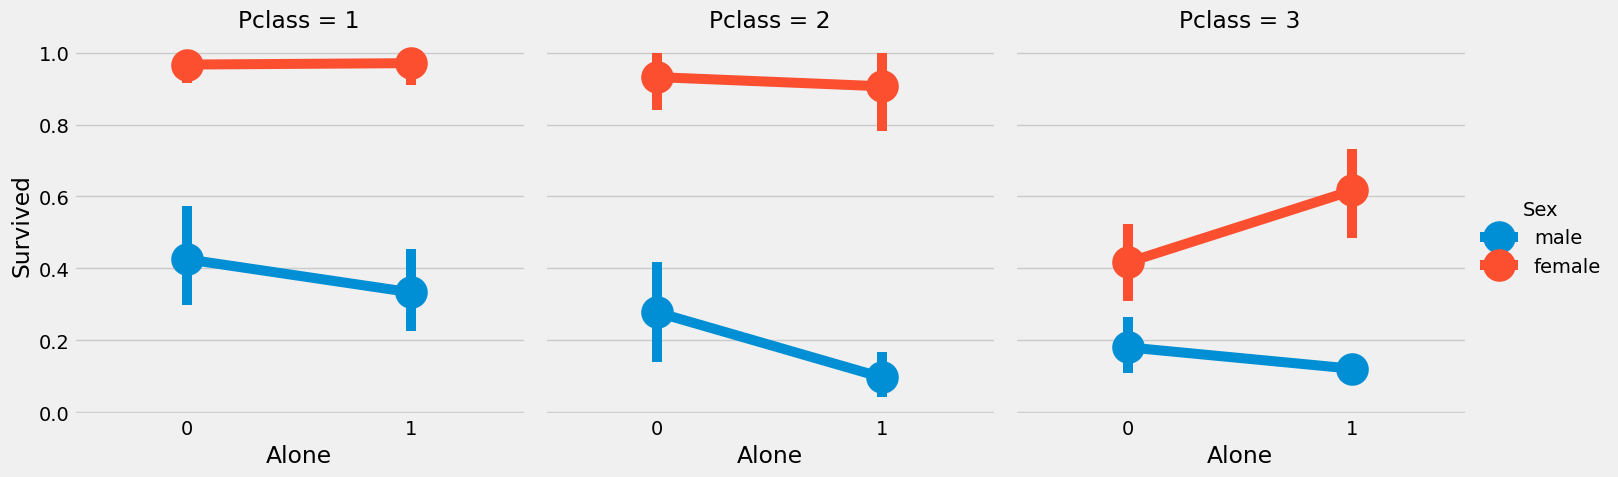

In [ ]:
sns.catplot(x='Alone',y='Survived',data=data,hue='Sex',col='Pclass', kind='point')
plt.show()

혼자 탑승하는 것은 성별이나 객실 등급(Pclass)에 관계없이 생존율이 낮다는 것이 눈에 보입니다.

다만, 3등급(Pclass 3)의 경우, 혼자인 여성의 생존 가능성이 가족과 함께 있는 여성보다 높습니다.

## Fare_Range
Fare 역시 연속형 특성이기 때문에, 우리는 이것을 순서형 값(Ordinal value)으로 변환해야 합니다. 이를 위해 pandas.qcut을 사용할 것입니다.

qcut: 우리가 지정한 구간(bin)의 수에 따라 값을 분할하거나 배열하는 기능을 수행합니다. 따라서 만약 우리가 5개의 구간을 전달하면, 데이터의 값들을 5개의 분리된 구간 또는 값 범위로 균등하게 나누어 배열할 것입니다.

In [ ]:
data['Fare_Range']=pd.qcut(data['Fare'],4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


fare_range가 증가할수록 생존 가능성도 증가한다는 것을 명확하게 알 수 있습니다.

이제 우리는 이 fare_range 값들을 그대로 모델에 전달할 수 없습니다. Age_Band에서 했던 것과 마찬가지로, 이 값들을 단일 값(singleton values)으로 변환해야 합니다.

In [ ]:
data['Fare_cat']=0
data.loc[data['Fare']<=7.91,'Fare_cat']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_cat']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_cat']=3

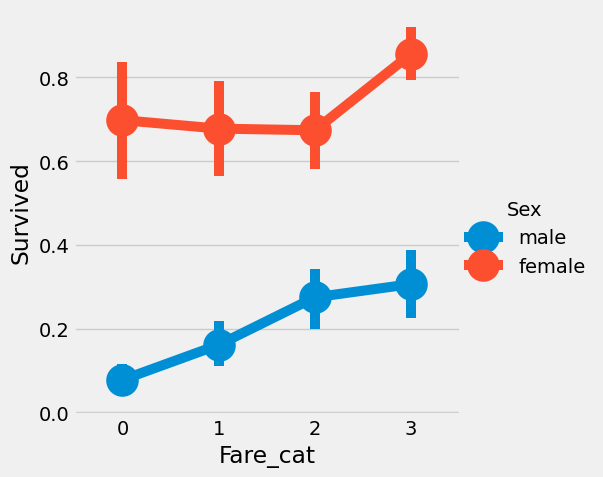

In [ ]:
sns.catplot(x='Fare_cat',y='Survived',data=data,hue='Sex', kind='point')
plt.show()

Fare_cat이 증가할수록 생존 가능성이 증가한다는 것은 분명합니다. 이 특성은 성별(Sex)과 더불어 모델링 과정에서 중요한 특성이 될 수 있습니다.

##문자열 값(String Values)을 숫자형으로 변환
머신러닝 모델에 문자열을 그대로 전달할 수 없기 때문에, 우리는 Sex (성별), Embarked (탑승 항구) 등과 같은 특성들을 숫자형 값으로 변환해야 합니다.

In [ ]:
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

## 불필요한 특성 제거
- Name (이름): 어떤 범주형 값으로도 변환될 수 없기 때문에 이름 특성은 필요하지 않습니다.- Age (나이): 이미 Age_band 특성이 있으므로, 이 특성은 필요 없습니다.
- Ticket (티켓 번호): 범주화할 수 없는 임의의 문자열입니다.
- Fare (운임): 이미 Fare_cat 특성이 있으므로 필요 없습니다.
- Cabin (객실 번호): 결측값(NaN)이 매우 많으며, 또한 많은 승객들이 여러 개의 객실을 가지고 있습니다. 따라서 이것은 쓸모없는 특성입니다.
- Fare_Range: 이미 Fare_cat 특성이 있습니다.
- PassengerId (승객 ID): 범주화될 수 없습니다.

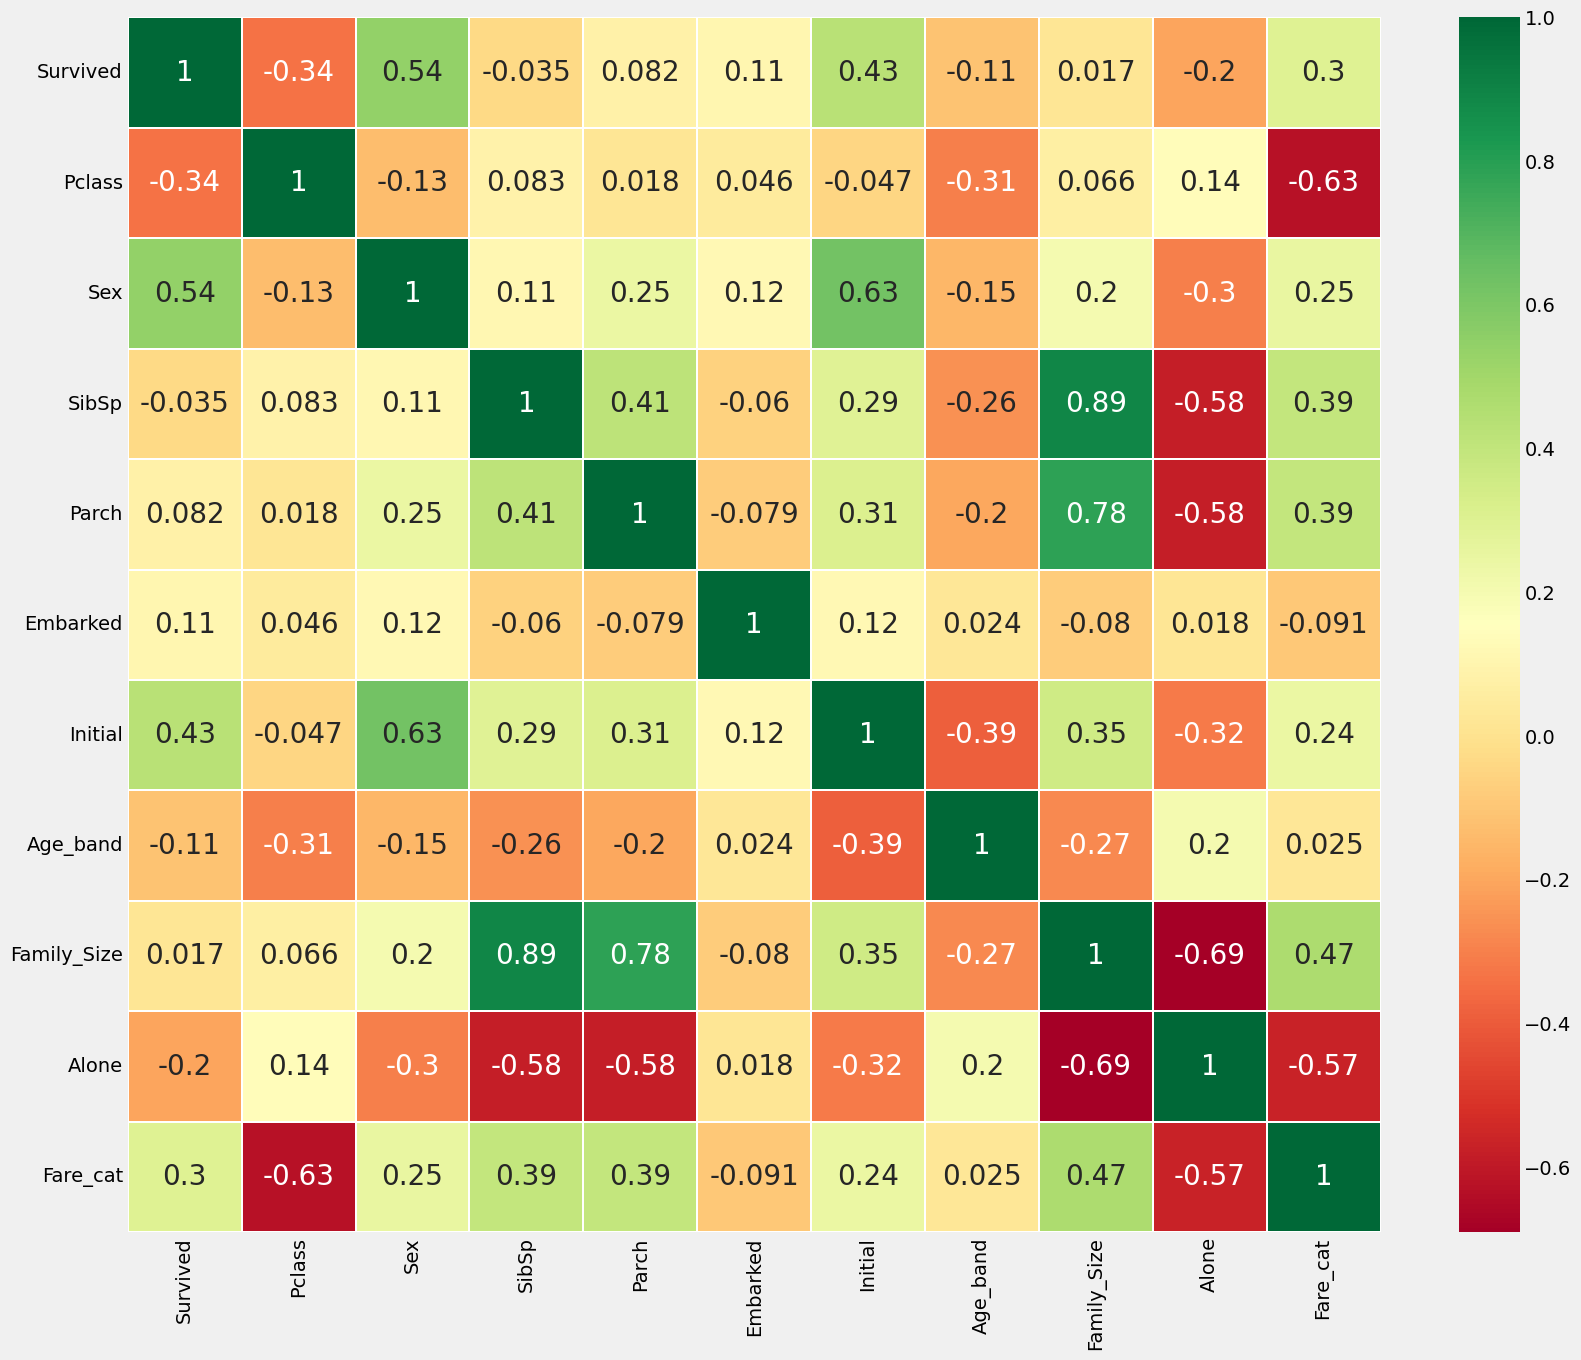

In [ ]:
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})  #annot=True: 히트맵 각 셀 안에 숫자 값을 표시
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

- 양의 상관관계를 보이는 특성으로는 SibSp (형제/배우자 수)와 Family_Size (가족 규모), 그리고 Parch (부모/자녀 수)와 Family_Size (가족 규모)가 있습니다.
- Alone (단독 탑승 여부)와 Family_Size (가족 규모)처럼 음의 상관관계를 가진 특성들도 있습니다.

# Part3:예측 모델링 (Predictive Modeling)
우리는 EDA (탐색적 데이터 분석)를 통해 몇 가지 통찰력을 얻었습니다. 하지만 이것만으로는 승객이 생존할지 사망할지 정확하게 예측하거나 단언할 수 없습니다. 따라서 이제 몇 가지 훌륭한 분류(Classification) 알고리즘을 사용하여 승객의 생존 여부를 예측할 것입니다.

모델을 만드는 데 사용할 알고리즘
1. 로지스틱 회귀 (Logistic Regression)
2. 서포트 벡터 머신 (Support Vector Machines) (선형 및 방사형)
3. 랜덤 포레스트 (Random Forest)
4. K-최근접 이웃 (K-Nearest Neighbours)
5. 나이브 베이즈 (Naive Bayes)
6. 결정 트리 (Decision Tree)



In [ ]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [ ]:
train,test=train_test_split(data,test_size=0.3,random_state=0,stratify=data['Survived'])
train_X=train[train.columns[1:]]
train_Y=train[train.columns[:1]]
test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]
X=data[data.columns[1:]]
Y=data['Survived']

1. 데이터 분할: 훈련 세트와 테스트 세트
train_test_split(data, ...): 데이터셋(data)을 무작위로 나누는 함수입니다.
- test_size=0.3: 전체 데이터 중 30%를 테스트 데이터(test)로 사용하고, 나머지 70%를 훈련 데이터(train)로 사용하겠다는 의미입니다.
- random_state=0: 무작위 분할 시 시드(seed) 값을 고정하여, 코드를 다시 실행해도 항상 동일한 결과로 분할되도록 보장합니다.
- stratify=data['Survived']: 데이터를 분할할 때, 목표 변수(Survived, 즉 생존 여부)의 비율이 훈련 세트와 테스트 세트 모두에서 동일하게 유지되도록 합니다. (예: 전체 데이터에서 생존자가 38%라면, 훈련 세트와 테스트 세트 모두 생존자가 약 38%가 되도록 분할합니다.)

2. 훈련 세트의 입력/출력 분리
- train_X (훈련 입력 데이터, Feature): 훈련 데이터(train)에서 첫 번째 열을 제외한 나머지 모든 열을 선택합니다. (일반적으로 첫 번째 열은 목표 변수(Y)이므로, 나머지 열은 모델의 입력이 될 특성(X)이 됩니다.)
- train_Y (훈련 출력 데이터, Target): 훈련 데이터(train)에서 첫 번째 열만을 선택합니다. (이것이 모델이 예측해야 할 목표 변수(Y)입니다. 여기서는 'Survived' 열.)

3. 테스트 세트의 입력/출력 분리
2번과 동일

4. 전체 데이터의 입력/출력 정의 (선택적)
- X (전체 입력 데이터): 전체 데이터(data)에서 첫 번째 열을 제외한 모든 특성을 선택합니다.
- Y (전체 출력 데이터): 전체 데이터(data)에서 'Survived' 열을 선택합니다. (이 변수들은 교차 검증(Cross Validation)이나 전체 데이터로 모델을 재훈련할 때 사용하기 위해 정의되었을 수 있습니다.)

## Radial Support Vector Machines(rbf-SVM)

In [ ]:
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(train_X,train_Y)
prediction1=model.predict(test_X)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction1,test_Y))

Accuracy for rbf SVM is  0.835820895522388


## Linear Support Vector Machine(linear-SVM)

In [ ]:
model=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model.fit(train_X,train_Y)
prediction2=model.predict(test_X)
print('Accuracy for linear SVM is',metrics.accuracy_score(prediction2,test_Y))

Accuracy for linear SVM is 0.8171641791044776


## Logistic Regression

In [ ]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))

The accuracy of the Logistic Regression is 0.8134328358208955


## Decision Tree

In [ ]:
model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))

The accuracy of the Decision Tree is 0.8059701492537313


##K-Nearest Neighbours(KNN)

In [ ]:
model=KNeighborsClassifier()
model.fit(train_X,train_Y)
prediction5=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction5,test_Y))

The accuracy of the KNN is 0.8134328358208955


K-NN (K-Nearest Neighbours) 모델의 정확도는 n_neighbours 속성(attribute)의 값을 변경함에 따라 달라집니다. 기본값은 5입니다. 이제 다양한 n_neighbours 값에 대한 정확도를 확인해 봅시다.

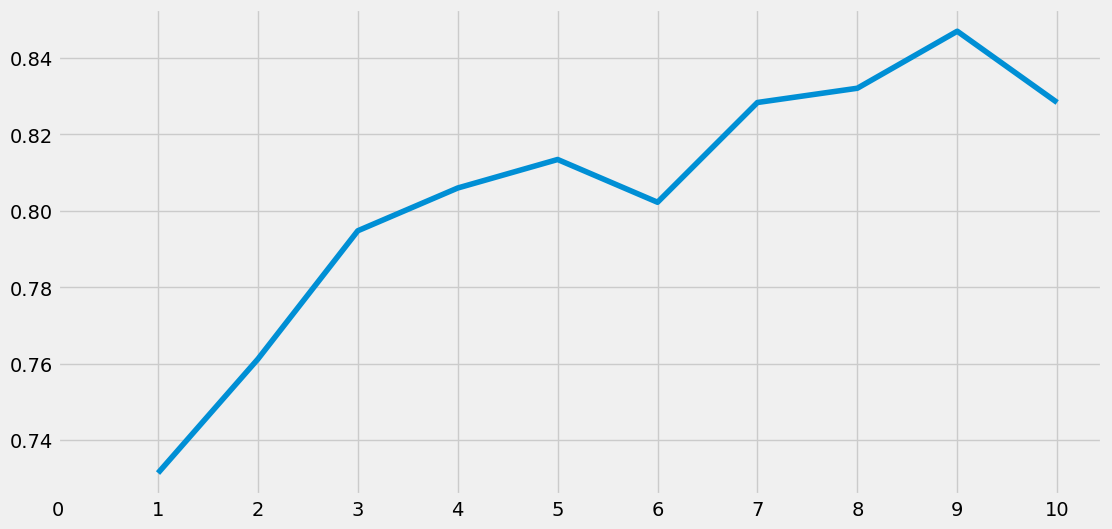

Accuracies for different values of n are: [0.73134328 0.76119403 0.79477612 0.80597015 0.81343284 0.80223881
 0.82835821 0.83208955 0.84701493 0.82835821] with the max value as  0.8470149253731343


In [ ]:
a_index=list(range(1,11)) #K 값 목록 생성: a_index라는 리스트를 생성합니다. 이 리스트는 K-NN에서 시도해 볼 이웃의 수, 즉 $\mathbf{K}$ 값 (1부터 10까지)을 담고 있으며, 그래프의 $\mathbf{X}$축 레이블로 사용될 것입니다.
a=pd.Series() #결과 저장용 시리즈 생성: a라는 이름의 빈 Pandas Series 객체를 생성합니다. 이 객체는 각 $K$ 값에 해당하는 모델의 정확도를 저장하는 데 사용됩니다.
x=[0,1,2,3,4,5,6,7,8,9,10] #X축 눈금 설정용 리스트: $X$축에 표시할 위치(눈금)를 정의하는 리스트입니다. (주로 plt.xticks와 함께 사용됩니다.)

for i in list(range(1,11)):
  model=KNeighborsClassifier(n_neighbors=i) #K-NN 모델 생성: 현재의 $\mathbf{i}$ 값을 이웃의 수(n_neighbors)로 설정하여 $\mathbf{K-NN}$ 분류 모델을 생성
  model.fit(train_X,train_Y)
  prediction=model.predict(test_X)
  a = pd.concat([a, pd.Series([metrics.accuracy_score(prediction, test_Y)])], ignore_index=True) #예측 결과(prediction)와 실제 테스트 정답 $\mathbf{test_Y}$를 비교하여 **정확도(accuracy score)**를 계산합니다. 이 정확도 값을 a Series에 추가(append)
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:',a.values,'with the max value as ',a.values.max())

## Gaussian Naive Bayes

In [ ]:
model=GaussianNB()
model.fit(train_X,train_Y)
prediction6=model.predict(test_X)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction6,test_Y))

The accuracy of the NaiveBayes is 0.8134328358208955


## Random Forests

In [ ]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_Y)
prediction7=model.predict(test_X)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction7,test_Y))

The accuracy of the Random Forests is 0.8059701492537313


모델의 정확도(accuracy)만이 분류기의 견고함(robustness)을 결정하는 유일한 요소는 아닙니다.

분류기가 훈련 데이터(training data)로 학습되고 테스트 데이터(test data)로 테스트되었을 때 90%의 정확도를 기록했다고 가정해 봅시다.

이것은 분류기에게는 매우 좋은 정확도처럼 보이지만, 새롭게 들어오는 모든 테스트 셋에 대해서도 90%의 정확도를 보장할 수 있을까요?

정답은 '아닙니다' 입니다. 왜냐하면 분류기가 어떤 인스턴스(데이터 샘플)를 사용하여 스스로를 훈련할지 우리가 결정할 수 없기 때문입니다. 훈련 데이터와 테스트 데이터가 바뀜에 따라 정확도 역시 변할 것입니다. 정확도는 증가할 수도 있고 감소할 수도 있습니다. 이것을 모델 분산(model variance)이라고 합니다.

이러한 문제를 극복하고 일반화된 모델을 얻기 위해 우리는 교차 검증(Cross Validation)을 사용합니다

## 교차 검증 (Cross Validation)
데이터는 종종 불균형할 수 있습니다.즉, 특정 클래스(예: 클래스 1)의 인스턴스는 많지만, 다른 클래스의 인스턴스는 적을 수 있습니다.

따라서 우리는 데이터셋의 각각의 모든 인스턴스를 사용하여 알고리즘을 훈련하고 테스트해야 합니다.

그런 다음, 데이터셋 전체에 대해 기록된 모든 정확도의 평균을 취할 수 있습니다.

- K-겹 교차 검증 (K-Fold Cross Validation)

K-겹 교차 검증은 먼저 데이터셋을 k개의 부분집합(k-subsets)으로 나눕니다.

데이터셋을 (예를 들어, k=5개의) 부분으로 나눈다고 가정해 봅시다.

우리는 1개의 부분을 테스트용으로 남겨두고, 나머지 4개의 부분을 사용하여 알고리즘을 훈련합니다.

우리는 매 반복마다 테스트 부분을 변경하고, 나머지 부분들로 알고리즘을 훈련하는 과정을 계속합니다.

그런 다음, 기록된 정확도와 오류를 평균하여 알고리즘의 평균 정확도를 얻습니다.

알고리즘은 특정 훈련 데이터에서는 데이터에 과소적합될 수 있고, 다른 훈련 세트에서는 데이터에 과대적합*될 수도 있습니다. 따라서 교차 검증을 통해 우리는 일반화된 모델을 얻을 수 있습니다.

In [ ]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=10, shuffle=True, random_state=22) # k=10, split the data into 10 equal parts
xyz=[] #xyz에는 각 모델의 평균 정확도(CV Mean)가 저장
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']  #사용할 모델 이름 목록
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.784607,0.057841
Radial Svm,0.828377,0.057096
Logistic Regression,0.799176,0.040154
KNN,0.808140,0.035630
Decision Tree,0.801361,0.042872
Naive Bayes,0.795843,0.054861
Random Forest,0.812622,0.048216


<Axes: >

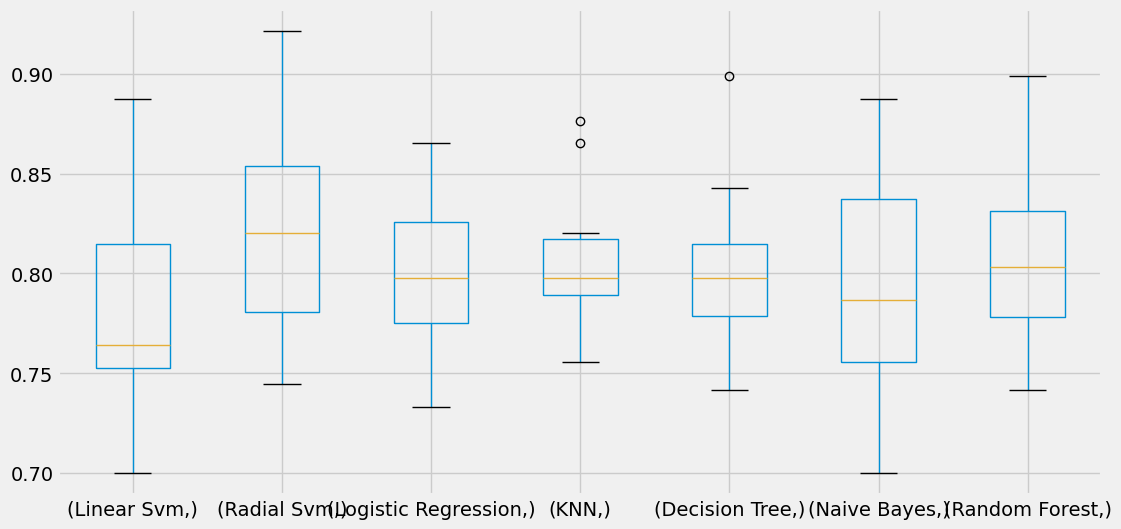

In [ ]:
plt.subplots(figsize=(12,6))
box=pd.DataFrame(accuracy,index=[classifiers])
box.T.boxplot()

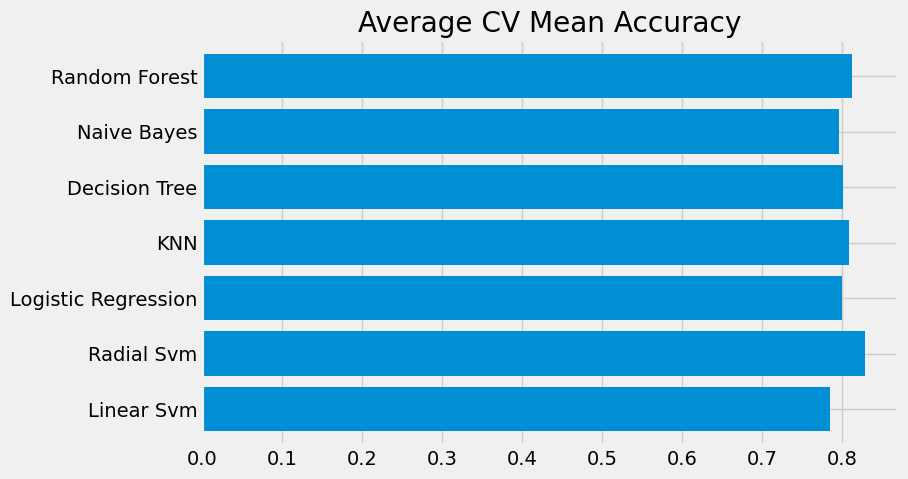

In [ ]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

분류 정확도(classification accuracy)는 데이터의 불균형(imbalance) 때문에 때로는 오해의 소지가 있을 수 있습니다.

우리는 모델이 어디서 잘못 예측했는지, 또는 모델이 어떤 클래스(class)를 틀리게 예측했는지를 보여주는 혼동 행렬(confusion matrix)의 도움으로 요약된 결과를 얻을 수 있습니다.

##혼동 행렬
혼동 행렬은 분류기(classifier)가 수행한 정확한 분류와 부정확한 분류의 수를 제공합니다.

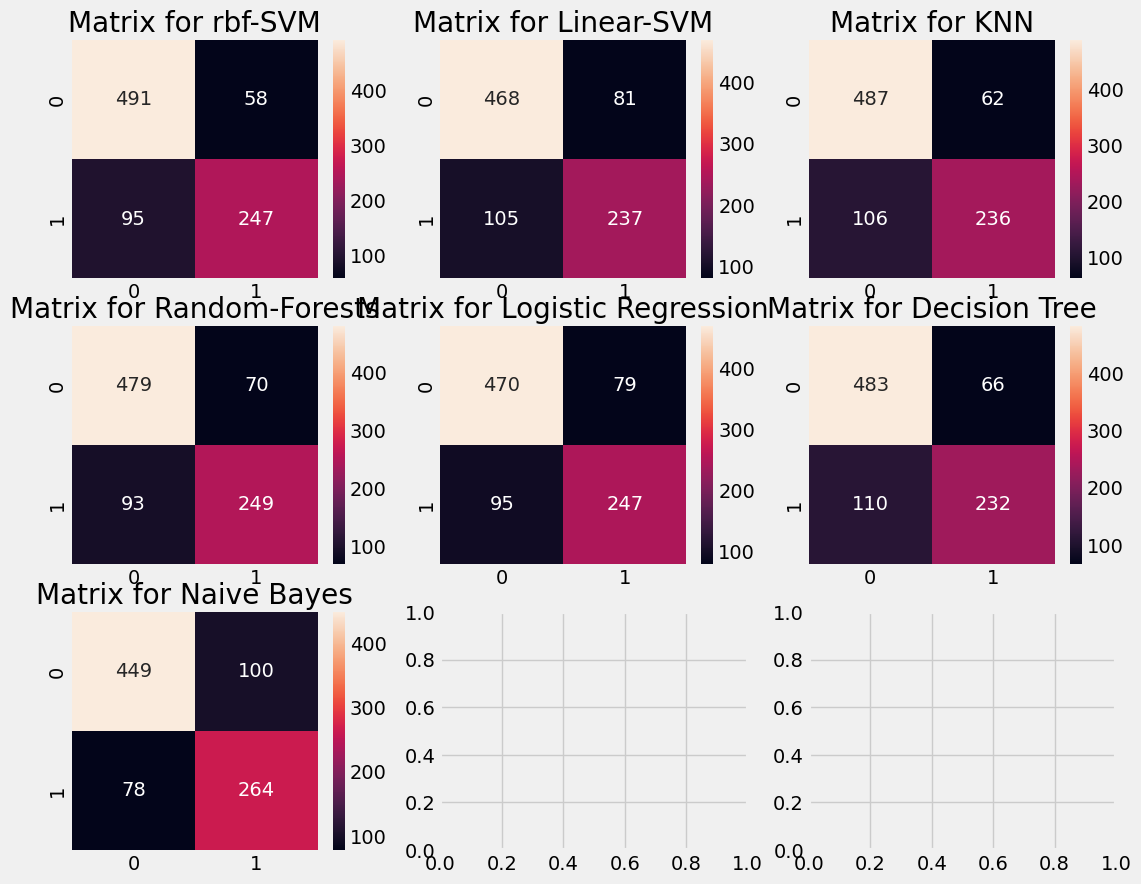

In [ ]:
f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

혼동 행렬에서 왼쪽 대각선은 각 클래스에 대해 정확하게 예측된 수를 보여주고, 오른쪽 대각선은 잘못 예측된 수를 보여줍니다.

rbf-SVM (방사형 커널 SVM)에 대한 첫 번째 그래프를 예로 들어 봅시다

- 정확한 예측 수: 491명 (사망) + 247명 (생존) 입니다. 평균 교차 검증(CV) 정확도는 (491 + 247) / 891 = 82.8%이며, 이는 우리가 이전에 얻었던 결과와 일치합니다.

- 오류: 사망자 58명을 생존자로 잘못 분류했고, 생존자 95명을 사망자로 잘못 분류했습니다. 따라서 이 모델은 사망자를 생존자로 예측하면서 더 많은 실수를 저질렀습니다.

모든 행렬을 살펴보면, rbf-SVM은 사망 승객을 정확하게 예측할 확률이 더 높지만, 나이브 베이즈(Naive Bayes)는 생존 승객을 정확하게 예측할 확률이 더 높다고 말할 수 있습니다.

## 하이퍼 파라미터 튜닝
머신러닝 모델의 블랙박스에는 기본(default) 매개변수 값들이 있으며, 우리는 이 값들을 조정하거나 변경하여 더 나은 모델을 얻을 수 있습니다.

예를 들어, SVM 모델의 C와 gamma 값, 그리고 다른 분류기들의 다양한 매개변수들은 하이퍼파라미터라고 불립니다.

우리는 이 하이퍼파라미터를 조정하여 알고리즘의 학습률을 변경하고 더 나은 모델을 얻을 수 있습니다. 이 과정을 하이퍼파라미터 튜닝이라고 합니다.

우리는 가장 좋은 분류기 두 가지, 즉 SVM과 랜덤 포레스트에 대해 하이퍼파라미터를 튜닝할 것입니다.

### SVM

In [ ]:
from sklearn.model_selection import GridSearchCV
C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf','linear']
hyper={'kernel':kernel,'C':C,'gamma':gamma}
gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
0.8282593685267716
SVC(C=0.4, gamma=0.3)


* C 정의: SVM 모델의 정규화 매개변수 (Regularization parameter*인 C에 대해 시도해 볼 값들(0.05부터 1.0까지)을 정의합니다. C는 오류 허용 정도를 조절합니다.

* gamma 정의: 주로 rbf 커널에서 사용되는 매개변수로, 단일 훈련 샘플이 미치는 영향의 범위를 결정하는 gamma에 대해 시도해 볼 값들(0.1부터 1.0까지)을 정의합니다.

* kernel 정의: SVM에 사용할 커널 함수의 종류를 rbf (방사형 기저 함수)와 linear (선형)로 정의합니다.

* hyper 딕셔너리 생성: 위에서 정의한 모든 하이퍼파라미터 리스트를 키-값 쌍으로 묶어 탐색할 그리드를 정의합니다. GridSearchCV는 이 딕셔너리에 있는 모든 조합을 시도합니다.

* GridSearchCV 객체 생성: 그리드 탐색 객체(gd)를 초기화합니다.

  - estimator=svm.SVC(): 튜닝할 기반 모델로 SVM 분류기(svm.SVC)를 지정합니다.

  - param_grid=hyper: 탐색할 하이퍼파라미터의 그리드를 앞서 정의한 hyper 딕셔너리로 지정합니다.

  - verbose=True: 탐색 과정 중에 진행 상황과 메시지를 자세히 출력하도록 설정합니다.
* 모델 적합 (Fitting): 정의된 그리드 탐색을 전체 데이터 X(특성)와 Y(정답)에 대해 실행합니다. 이 과정에서 GridSearchCV는 내부적으로 교차 검증을 사용하여 hyper에 정의된 모든 하이퍼파라미터 조합에 대해 모델을 훈련하고 성능을 평가합니다.

* 수많은 하이퍼파라미터 조합 중에서 가장 성능이 좋은 (최적의) SVM 모델 설정을 자동화된 방식으로 찾아내는 역할을 합니다.

### 랜덤포레스트

In [ ]:
n_estimators=range(100,1000,100)
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.819327098110602
RandomForestClassifier(n_estimators=300, random_state=0)


* n_estimators 정의: 랜덤 포레스트에서 사용할 트리(결정 트리)의 개수(n_estimators)에 대해 시도해 볼 값들의 범위를 정의합니다.

  - range(100, 1000, 100)는 100부터 시작하여 100씩 증가하며 900까지의 값들(100, 200, 300, ..., 900)을 의미합니다.

* hyper 딕셔너리 생성: GridSearchCV가 탐색할 하이퍼파라미터의 그리드를 정의합니다. 여기서는 n_estimators 값들의 목록만을 탐색하도록 설정했습니다.

* 랜덤 포레스트 모델에서 트리의 개수를 100개부터 900개까지 시도해 보며 가장 예측 성능이 좋은 최적의 트리의 개수를 찾아내는 역할을 합니다.

## 앙상블
앙상블은 모델의 정확도나 성능을 높이는 좋은 방법입니다. 간단히 말해, 여러 개의 단순한 모델을 결합하여 하나의 강력한 모델을 만드는 것입니다.

예를 들어, 우리가 휴대폰을 구매하려고 할 때 여러 사람들에게 다양한 매개변수를 기반으로 의견을 묻는다고 가정해 봅시다. 그러면 우리는 모든 다른 매개변수를 분석한 후 단일 제품에 대해 강력한 판단을 내릴 수 있습니다. 이것이 바로 앙상블이며, 이는 모델의 안정성(stability)을 향상시킵니다.

앙상블은 다음과 같은 방식으로 수행될 수 있습니다:
1. Voting Classifier
2. Bagging
3. Boosting

### Voting Classifier
여러 개의 서로 다른 단순한 머신러닝 모델들의 예측을 결합하는 가장 간단한 방법입니다.

이것은 모든 하위 모델(submodels) 또는 기본 모델(basemodels)들의 예측을 기반으로 평균적인 예측 결과를 제공합니다. 이때 사용되는 하위 모델들은 모두 서로 다른 유형입니다.

In [ ]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
                                              ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                              ('RFor',RandomForestClassifier(n_estimators=500,random_state=0)),
                                              ('LR',LogisticRegression(C=0.05)),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('NB',GaussianNB()),
                                              ('svm',svm.SVC(kernel='linear',probability=True))
                                             ],
                       voting='soft').fit(train_X,train_Y)
print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(test_X,test_Y))
cross=cross_val_score(ensemble_lin_rbf,X,Y, cv = 10,scoring = "accuracy")
print('The cross validated score is',cross.mean())

The accuracy for ensembled model is: 0.8171641791044776
The cross validated score is 0.8260424469413234


### Bagging
데이터셋의 작은 부분(partitions)들에 유사한 분류기들을 적용한 다음, 모든 예측의 평균을 취하여 작동합니다. 이러한 평균화 덕분에 분산(variance)이 감소하는 효과가 있습니다. 보팅과 달리, 배깅은 유사한 분류기들을 활용합니다.

####Bagged KNN
배깅은 분산이 높은 모델에서 가장 잘 작동합니다. 이에 대한 예시로는 결정 트리(Decision Tree)나 랜덤 포레스트(Random Forests)가 있습니다. 우리는 작은 n_neighbours 값을 가진 K-NN을 사용할 수 있는데, n_neighbours 값이 작을수록 분산이 높아진다.

In [ ]:
from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier(estimator=KNeighborsClassifier(n_neighbors=3),random_state=0,n_estimators=700)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged KNN is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged KNN is:',result.mean())

The accuracy for bagged KNN is: 0.832089552238806
The cross validated score for bagged KNN is: 0.8104244694132333


####Bagged DecisionTree

In [ ]:
model=BaggingClassifier(estimator=DecisionTreeClassifier(),random_state=0,n_estimators=100)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged Decision Tree is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:',result.mean())

The accuracy for bagged Decision Tree is: 0.8208955223880597
The cross validated score for bagged Decision Tree is: 0.8171410736579275


### 부스팅
 분류기들의 순차적인 학습을 사용하는 앙상블 기법입니다. 이는 약한 모델을 단계적으로 강화하는 방식입니다.

부스팅은 다음과 같이 작동합니다

1. 모델은 먼저 전체 데이터셋으로 훈련됩니다. 이제 모델은 일부 인스턴스(데이터 샘플)는 맞히고 일부는 틀릴 것입니다.

2. 다음 반복(iteration)에서, 학습기(learner)는 잘못 예측된 인스턴스에 더 집중하거나, 이들에게 더 많은 가중치(weight)를 부여합니다. 따라서 잘못된 인스턴스를 올바르게 예측하려고 시도합니다.

3. 이러한 반복적인 과정이 계속되며, 정확도의 한계에 도달할 때까지 모델에 새로운 분류기들이 추가됩니다.

#### AdaBoost (적응형 부스팅)
이 경우, 약한 학습기(weak learner) 또는 예측기(estimator)는 결정 트리(Decision Tree)입니다. 하지만 우리는 이 기본 예측기(base_estimator)를 우리가 원하는 어떤 알고리즘으로든 변경할 수 있습니다.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)
result=cross_val_score(ada,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoost is:',result.mean())

The cross validated score for AdaBoost is: 0.8136828963795256


####확률적 경사 부스팅 (Stochastic Gradient Boosting)
여기서도 역시 약한 학습기(weak learner)는 결정 트리(Decision Tree)입니다.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
result=cross_val_score(grad,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for Gradient Boosting is:',result.mean())

The cross validated score for Gradient Boosting is: 0.8115230961298376


#### XGBoost

In [ ]:
import xgboost as xg
xgboost=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
result=cross_val_score(xgboost,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for XGBoost is:',result.mean())

The cross validated score for XGBoost is: 0.8182771535580524


AdaBoost(적응형 부스팅) 모델에서 가장 높은 정확도를 얻었습니다. 이제 하이퍼파라미터 튜닝(Hyper-Parameter Tuning)을 통해 그 정확도를 더 높여보겠습니다.

####Hyper-Parameter Tuning for AdaBoost

In [ ]:
n_estimators=list(range(100,1100,100))
learn_rate=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
gd=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
0.8293892411022534
AdaBoostClassifier(learning_rate=0.4, n_estimators=800)


AdaBoost에서 얻을 수 있는 최대 정확도는 learning_rate=0.4, n_estimators=800일 때 약 82.94%이다.

 ####Confusion Matrix for the Best Model

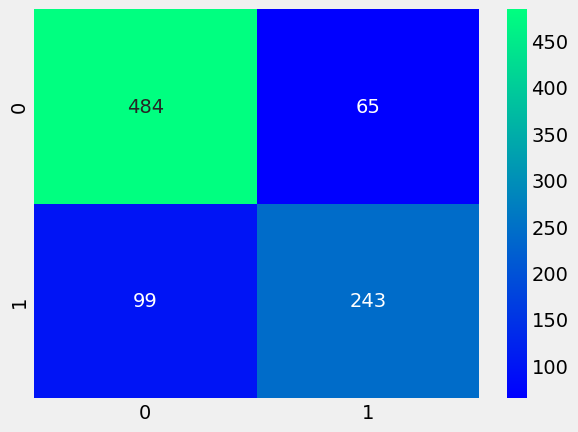

In [ ]:
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.05)
result=cross_val_predict(ada,X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,result),cmap='winter',annot=True,fmt='2.0f')
plt.show()

## Feature Importance

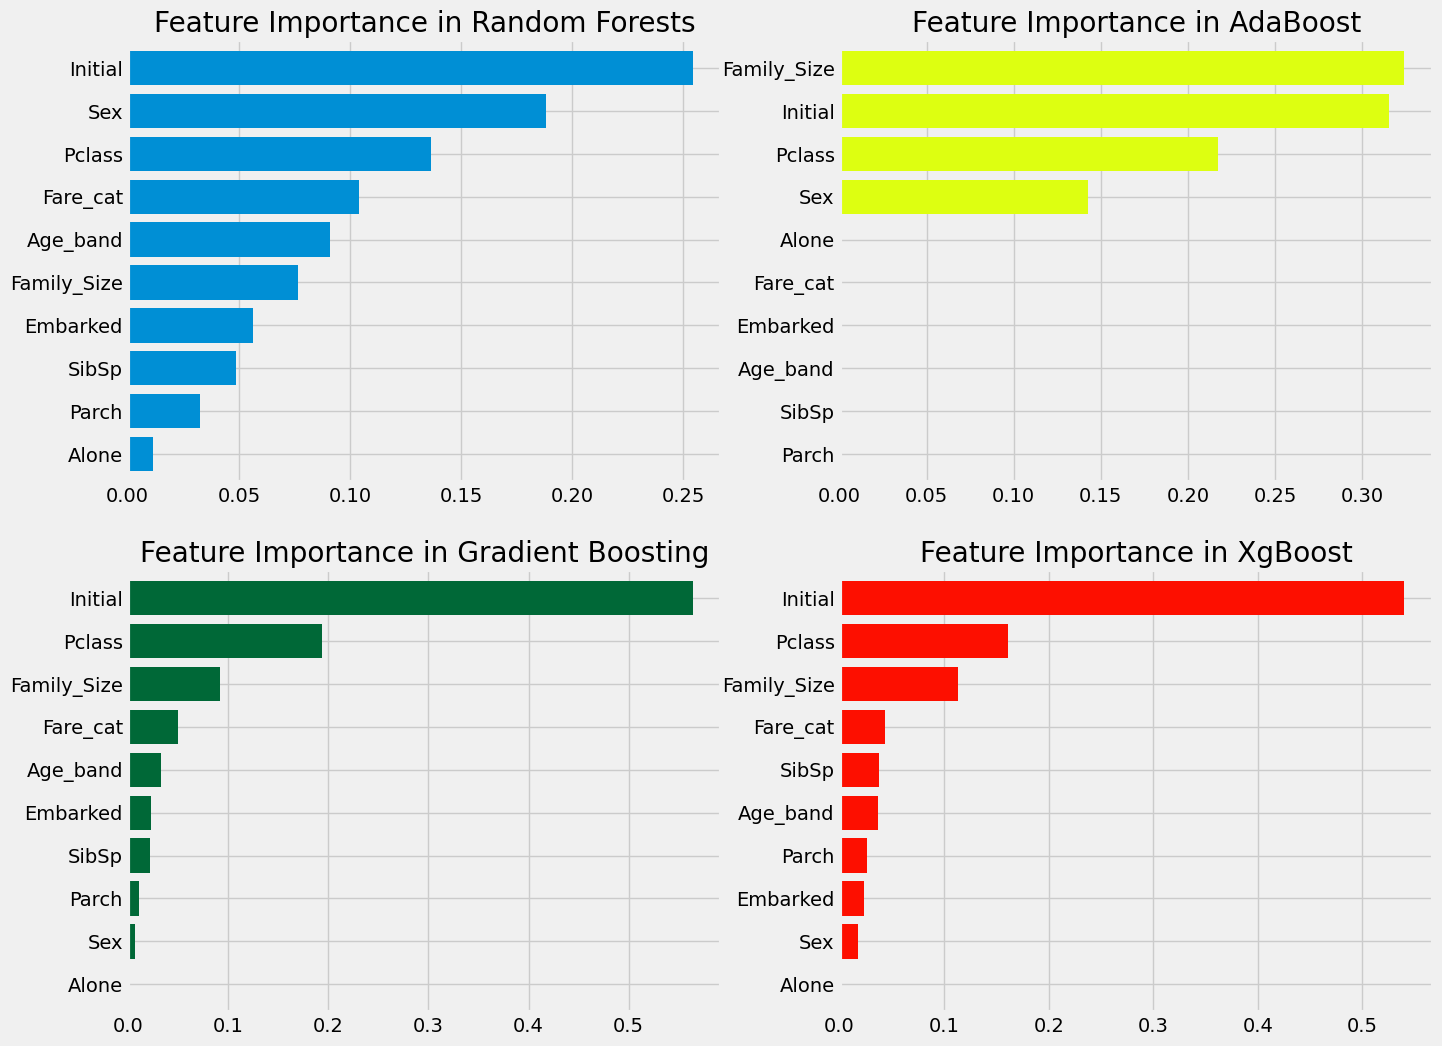

In [ ]:
f,ax=plt.subplots(2,2,figsize=(15,12))
model=RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')
model=AdaBoostClassifier(n_estimators=200,learning_rate=0.05,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')
model=GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')
model=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1],color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')
plt.show()

랜덤 포레스트, AdaBoost 등과 같은 다양한 분류기들에 대한 중요 특성(Important Features)을 확인할 수 있습니다.

1. 몇 가지 공통적으로 중요한 특성들은 Initial (호칭), Fare_cat (운임 범주), Pclass (객실 등급), Family_Size (가족 규모)입니다.

2. Sex (성별) 특성은 아무런 중요도를 보이지 않는 것으로 보여 충격적입니다. 왜냐하면 이전에 우리는 성별이 Pclass와 결합되었을 때 매우 좋은 구분 요소를 제공한다는 것을 확인했기 때문입니다. 성별(Sex)은 랜덤 포레스트에서만 중요한 것처럼 보입니다.

하지만, 많은 분류기에서 Initial (호칭) 특성이 상위에 있는 것을 볼 수 있습니다. 우리는 이미 성별(Sex)과 호칭(Initial) 사이에 양의 상관관계가 있다는 것을 확인했으므로, 이 둘은 젠더(성별)를 나타냅니다.

3. 유사하게, Pclass (객실 등급)와 Fare_cat (운임 범주)는 승객의 지위(status)를 나타내며, Family_Size (가족 규모)는 Alone (단독 탑승 여부), Parch (부모/자녀 수), SibSp (형제/배우자 수)와 관련됩니다.